# Preliminaries

In [1]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)

# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

import decimal
from decimal import Decimal

import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dropout,BatchNormalization,Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,MaxPooling2D # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

from pathlib import Path  

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from keras.models import load_model
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import plot_model

from sklearn.utils.class_weight import compute_sample_weight

pandas: 1.5.0
geopandas: 1.23.2
Tensorflow/Keras: 2.10.0
pandas: 1.5.0
numpy: 1.23.2


In [2]:
import tensorflow as tf

print(f'tensorflow version {tf.__version__}')

from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import * 

import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


tensorflow version 2.10.0


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Daily averages with vo,r,u,v,ttr,sst,shear

## Data

In [4]:
def dataLoad_noOversampling():
    train = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/training_sets_withrealtom.csv')
    val = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/validation_sets_withrealtom.csv')
    test = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/test_sets_withrealtom.csv')
    print(train.head())
    train['shear'] = train.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    val['shear'] = val.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
    test['shear'] = test.apply(lambda x: sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)

    #Split data
    x_train = train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******training features******")
    print (x_train)
    y_train = train.apply(lambda x: 1 if x.new_target>=50 else 0,axis=1)
    print ("******training target******")
    print (y_train)
    
    x_test = test.loc[test.time>='2016-04-01'][[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******test features******")
    print (x_test)
    y_test = test.loc[test.time>='2016-04-01'].apply(lambda x: 1 if x.new_target>=50 else 0,axis=1)
    print ("******test target******")
    print (y_test)
    
    x_val = val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']]
    print ("******validation features******")
    print (x_val)
    y_val = val.apply(lambda x: 1 if x.new_target>=50 else 0,axis=1)
    print ("******validation target******")
    print (y_val)
        
    return x_train, y_train, x_val, y_val, x_test, y_test

In [5]:
x_train, y_train, x_val, y_val, x_test, y_test = dataLoad_noOversampling()


   Unnamed: 0        time  latitude  longitude        vo          r     u_200  \
0           0  1980-01-01       0.0       20.0  0.000007  80.761185  1.909660   
1           1  1980-01-01       0.0       22.5  0.000004  80.703650  1.165733   
2           2  1980-01-01       0.0       25.0  0.000007  78.231514 -1.311676   
3           3  1980-01-01       0.0       27.5  0.000010  79.631010 -3.777573   
4           4  1980-01-01       0.0       30.0  0.000010  71.573875 -5.734505   

      u_850     v_200     v_850        ttr  sst  lsm  newlsm  new_target  \
0 -3.323872  1.687164 -1.823624 -247.54074  0.0  0.0     0.0         0.0   
1 -2.844494  1.060593 -1.991425 -240.00592  0.0  0.0     0.0         0.0   
2 -2.125244  3.280617 -1.931789 -223.76889  0.0  0.0     0.0         0.0   
3 -1.122395  5.743889 -1.243538 -235.55556  0.0  0.0     0.0         0.0   
4 -1.362953  6.514030 -0.954163 -254.03260  0.0  0.0     0.0         0.0   

   Real_tom_target  
0              0.0  
1             

In [6]:
trainScaler = StandardScaler()

x_train_scaled = trainScaler.fit_transform(x_train)
x_val_scaled = trainScaler.transform(x_val)
x_test_scaled = trainScaler.transform(x_test)

y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

## Models

### ExtraTree

In [12]:
#n_trees: 200 , min_samples_leaf: 1000 , max_features: sqrt 

from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=200, random_state=0, min_samples_leaf=1000, 
                           max_features='sqrt',n_jobs=-1,verbose=3)
clf.fit(np.concatenate((x_train_scaled,x_val_scaled),axis=0), np.concatenate((y_train,y_val),axis=0))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200
building tree 3 of 200

building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.7s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.4min


building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200building tree 130 of 200

building tree 131 of 200
building tree 132 of 200
building tree 133 of 200building tree 134 of 200

building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.8min finished


ExtraTreesClassifier(min_samples_leaf=1000, n_estimators=200, n_jobs=-1,
                     random_state=0, verbose=3)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.7s finished


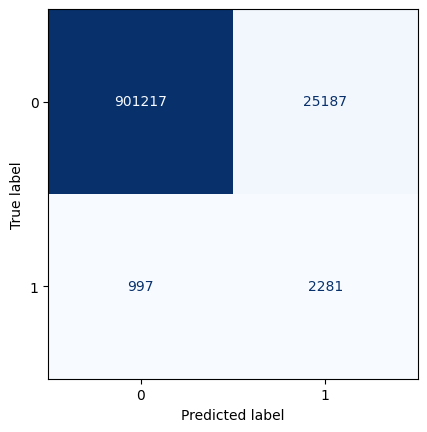

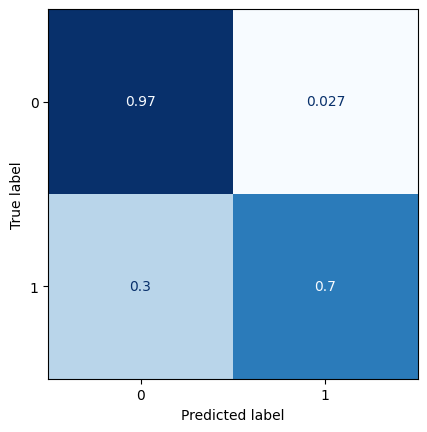

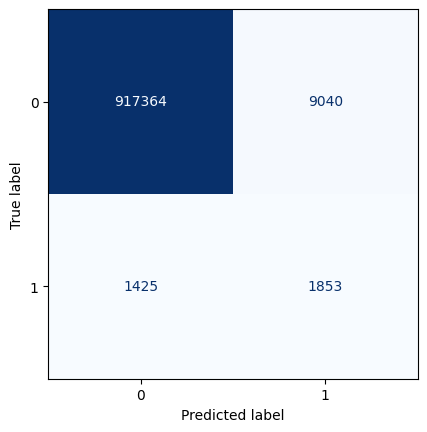

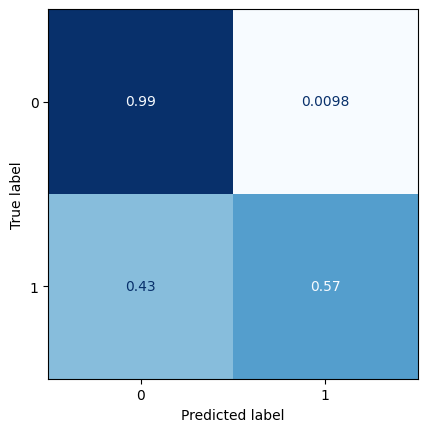

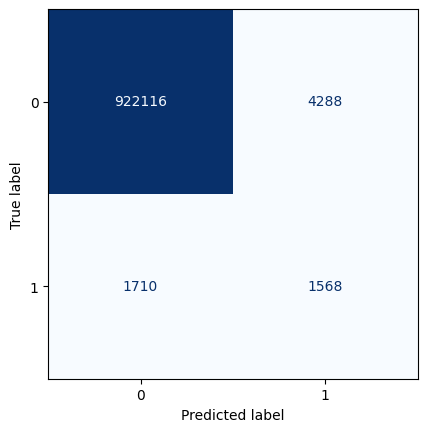

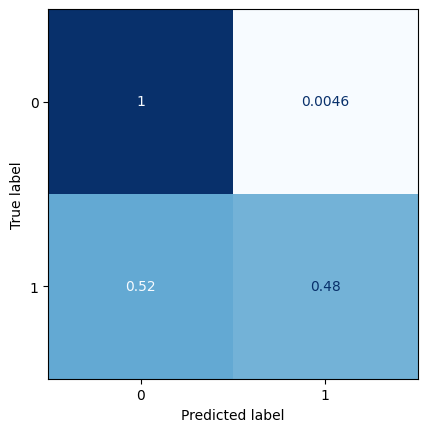

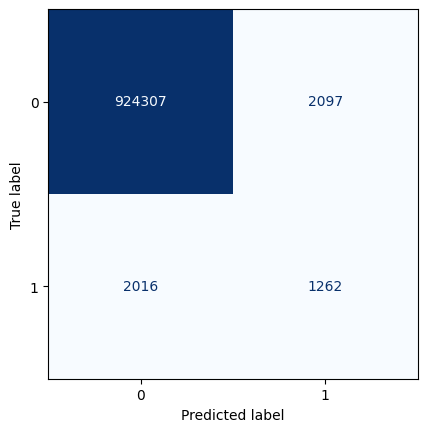

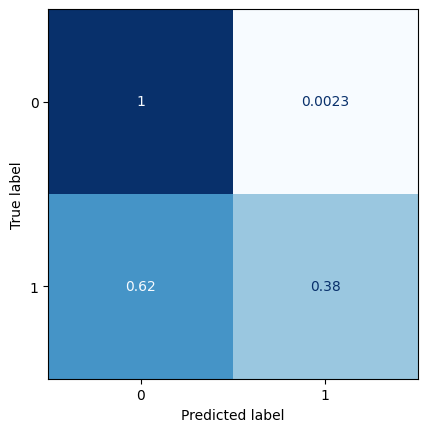

In [22]:
t = clf.predict_proba(x_test_scaled)
t = t[:,1]
ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t:
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test, classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test, classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    


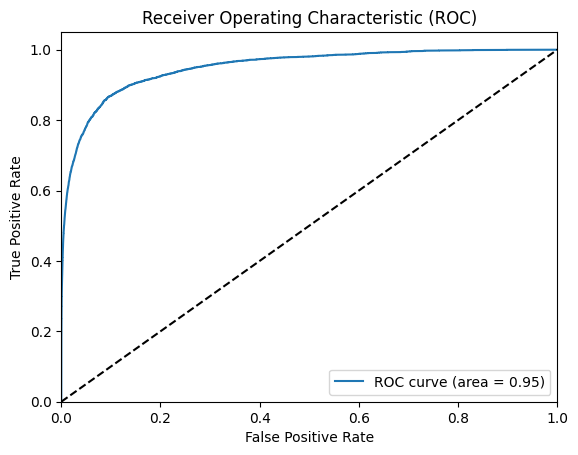

In [23]:
plot_roc(t,y_test)

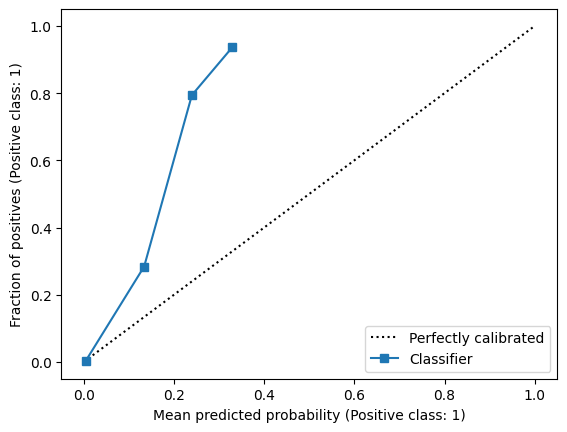

In [24]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(y_test, t, n_bins=10)


In [25]:
from sklearn.metrics import brier_score_loss
### brier score con probabilità predette

print(f'All zeros Brier score: {brier_score_loss(y_test, np.zeros(len(y_test)))}')
print(f'Model Brier score: {brier_score_loss(y_test, t)}')

All zeros Brier score: 0.0035259368257102965
Model Brier score: 0.003044358766818681


In [27]:
test = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/test_sets_withrealtom.csv')
test = test.loc[test.time>='2016-04-01']

In [28]:
test['predictions_lag0'] = t
test.to_csv("test_with_newTarget_predictions_RF_noOversampling.csv")
test = pd.read_csv('test_with_newTarget_predictions_RF_noOversampling.csv')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200building tree 16 of 200

building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   15.1s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.4min


building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.6s finished


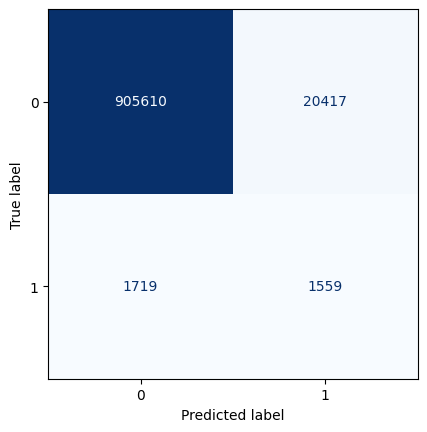

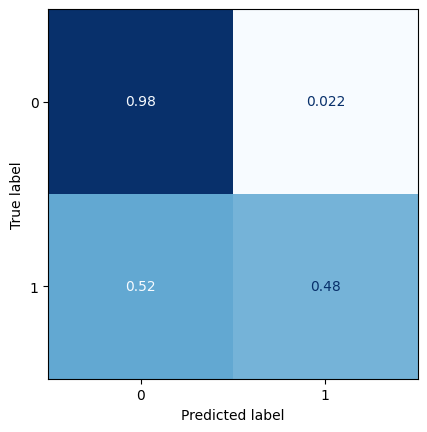

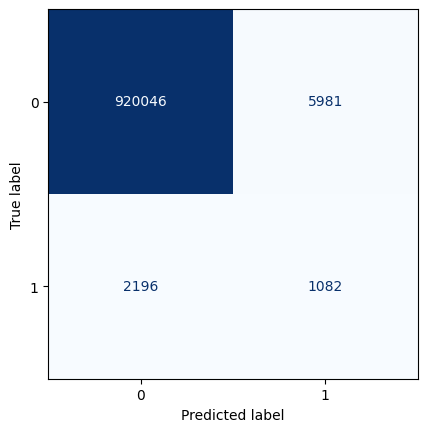

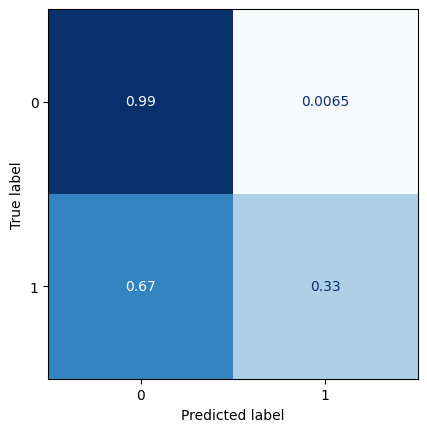

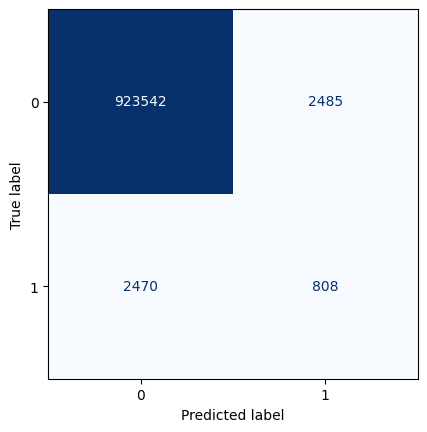

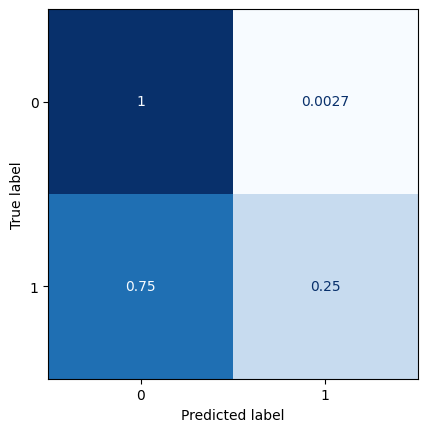

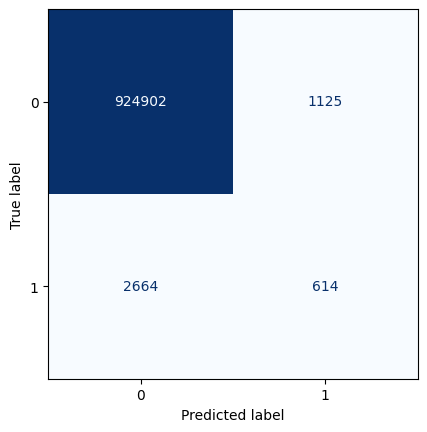

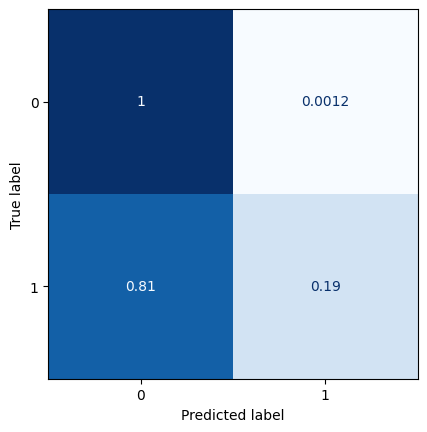

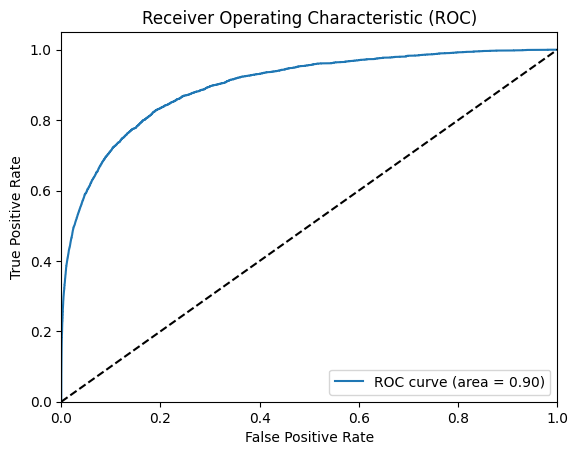

All zeros Brier score: 0.00352736722604527
Model Brier score: 0.0032814378479723736


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200
building tree 3 of 200

building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.7s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200building tree 39 of 200

building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.3min


building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.6s finished


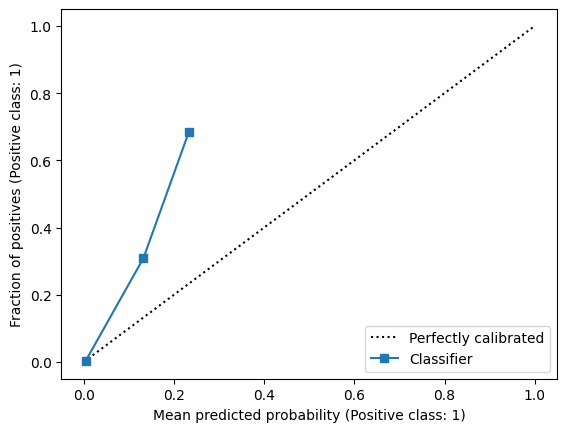

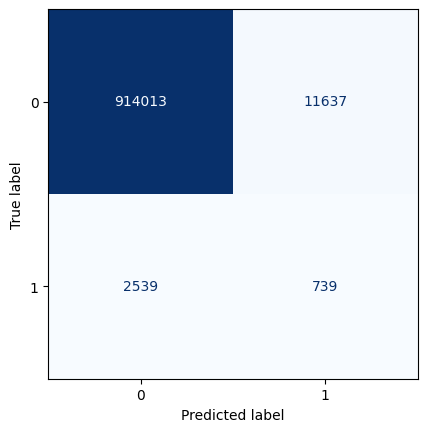

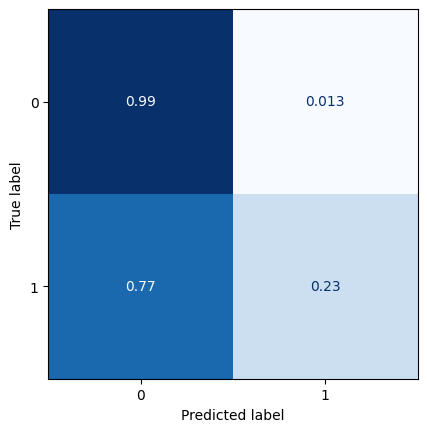

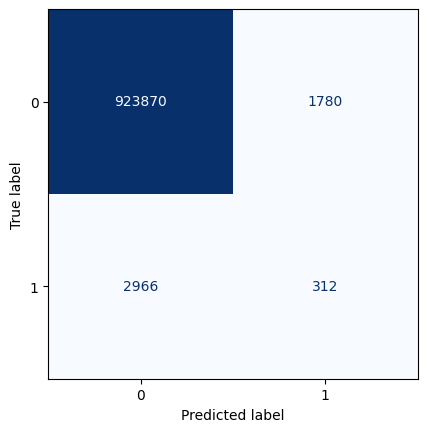

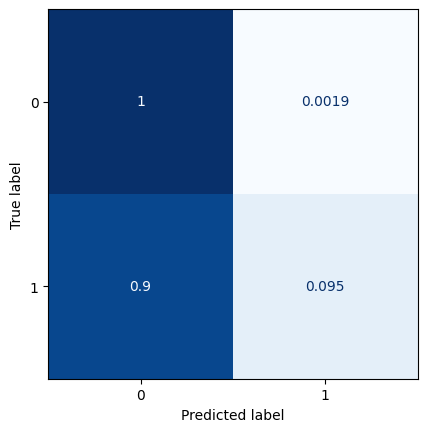

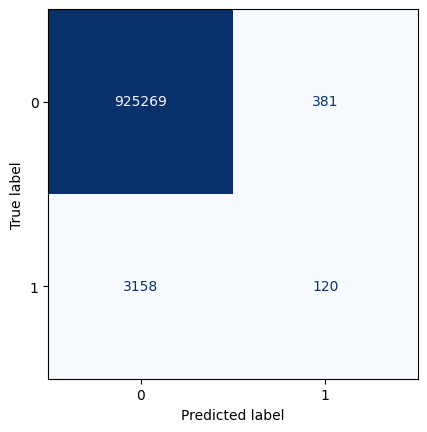

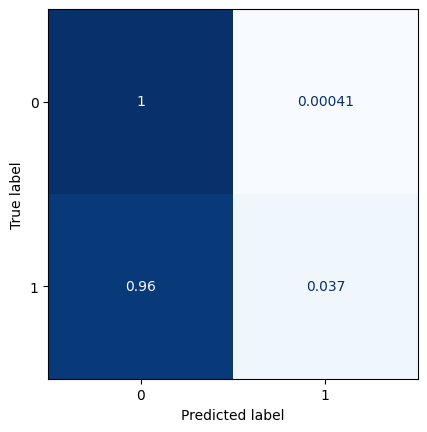

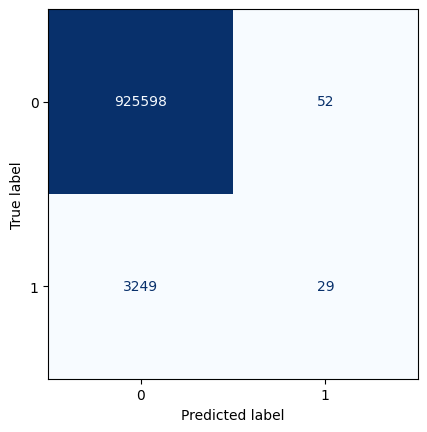

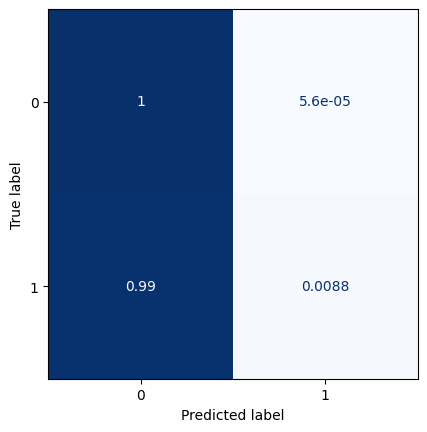

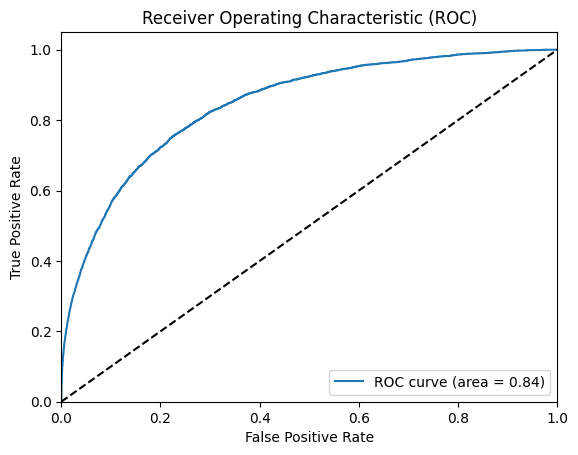

All zeros Brier score: 0.003528798787419477
Model Brier score: 0.003449519737954107


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200building tree 12 of 200

building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200building tree 17 of 200

building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.3s


building tree 26 of 200building tree 25 of 200

building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.3min


building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.6s finished


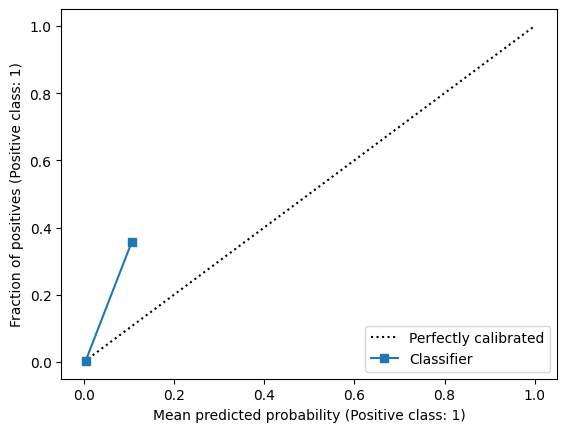

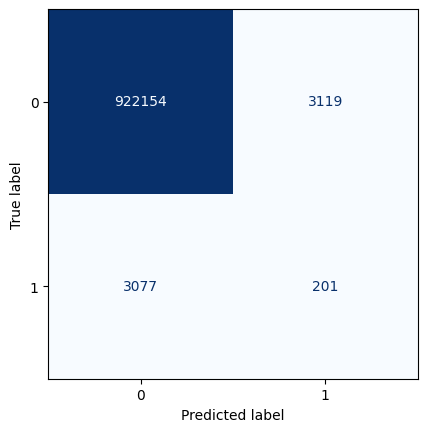

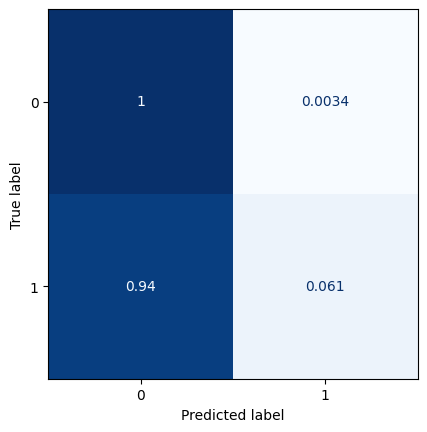

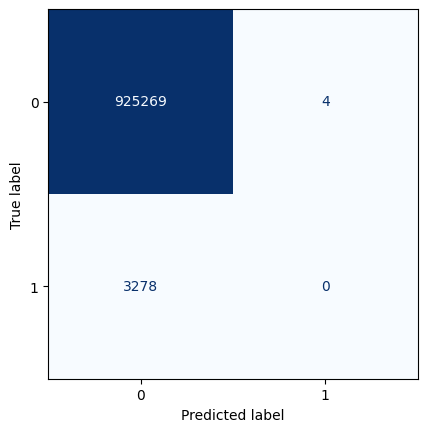

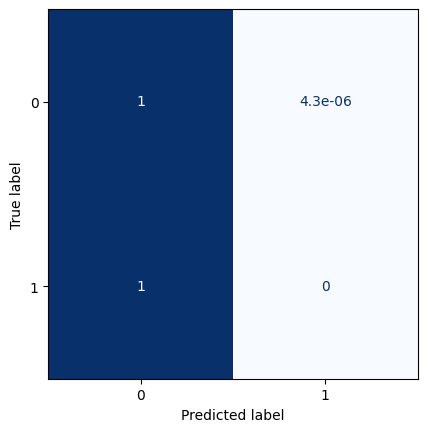

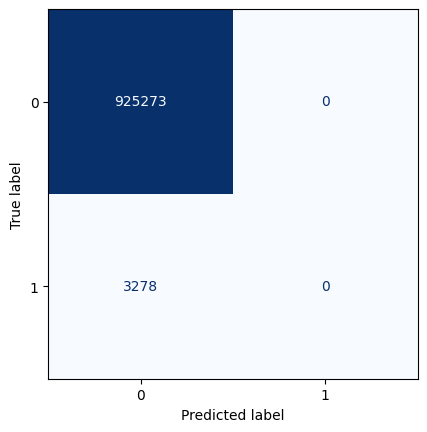

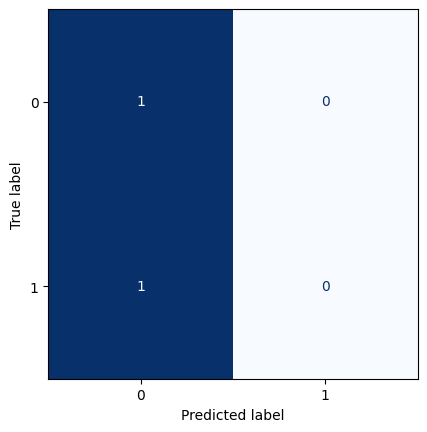

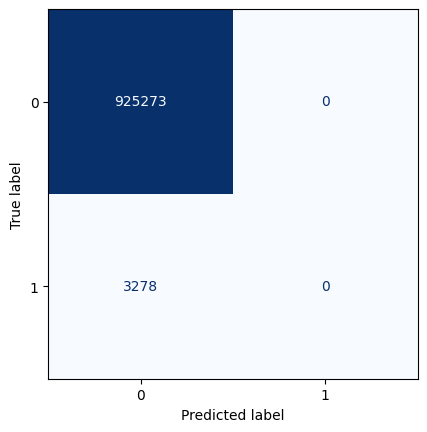

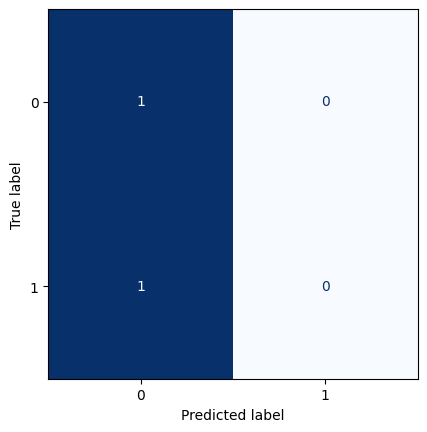

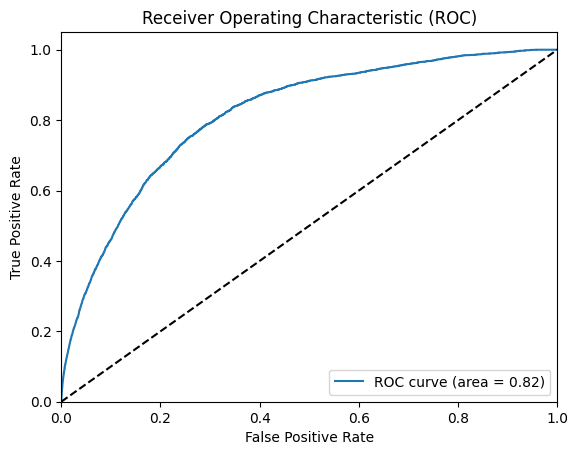

All zeros Brier score: 0.0035302315112470937
Model Brier score: 0.0034895668045430072


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200
building tree 3 of 200

building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.3s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.3min


building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.8s finished


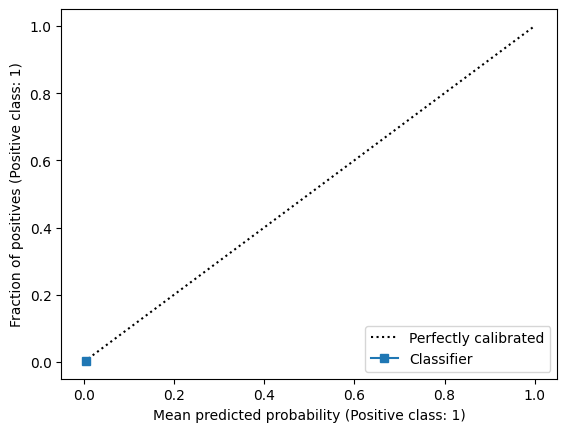

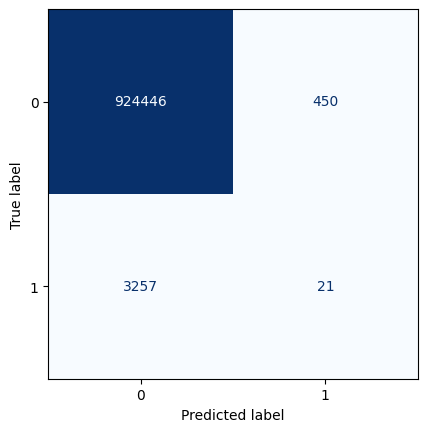

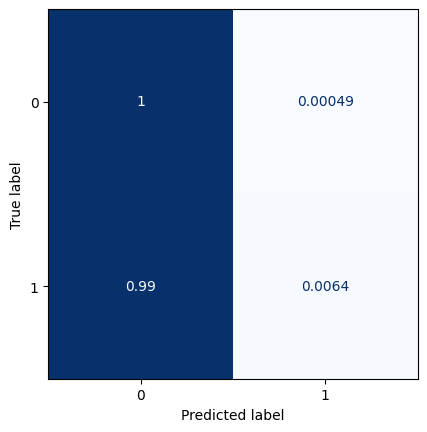

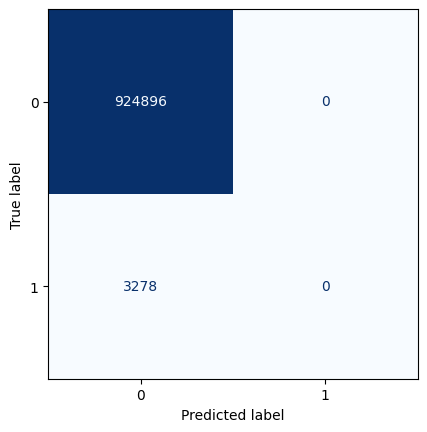

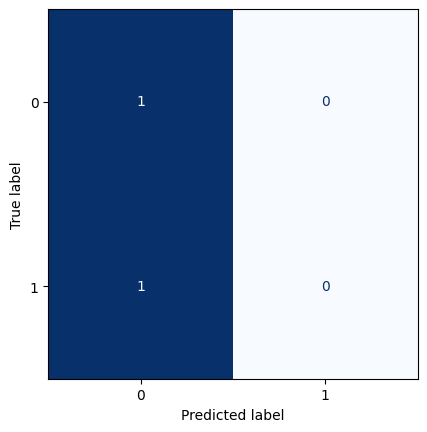

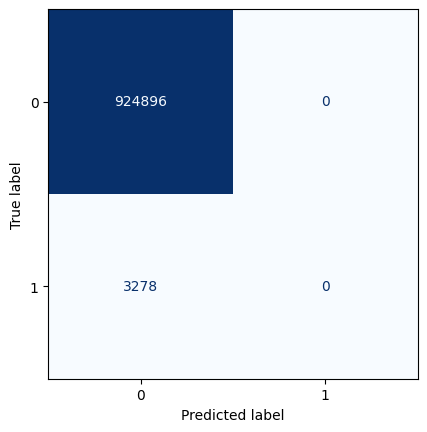

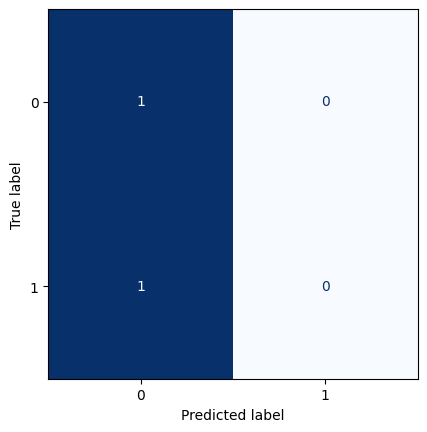

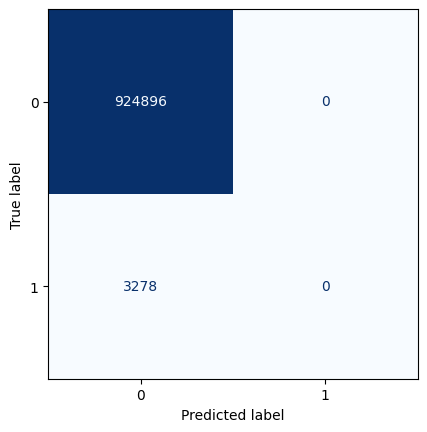

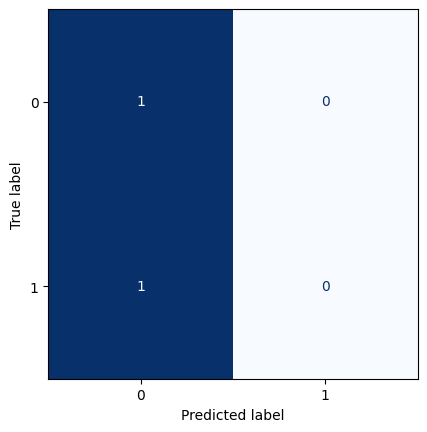

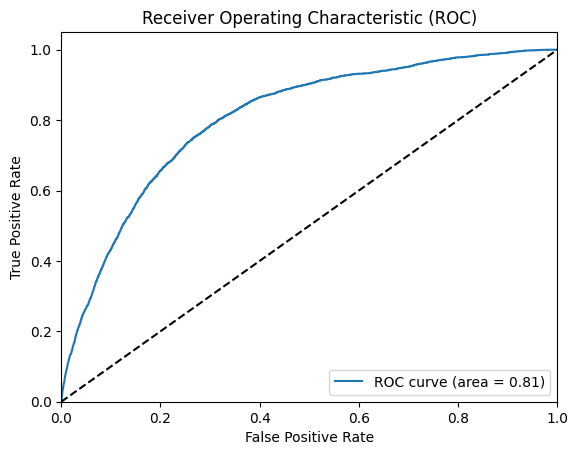

All zeros Brier score: 0.0035316653989445946
Model Brier score: 0.003498508970254255


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200building tree 16 of 200

building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.3s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.2min


building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.7s finished


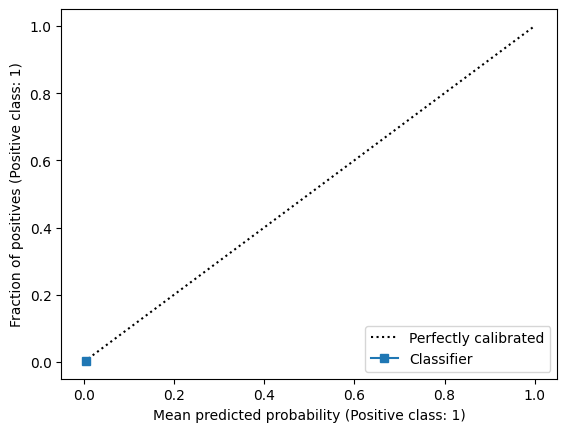

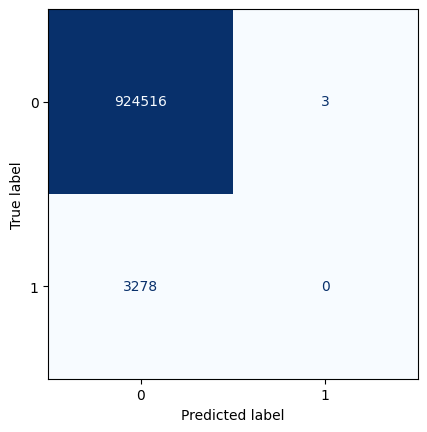

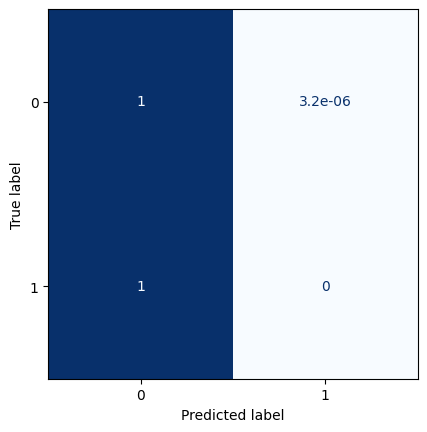

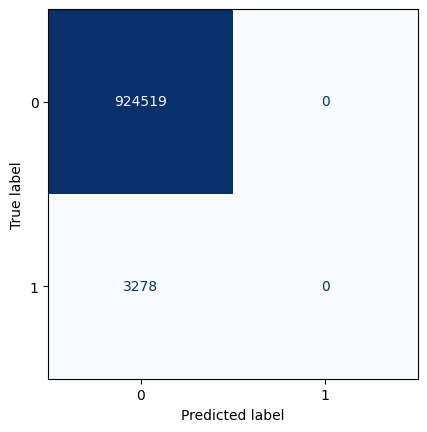

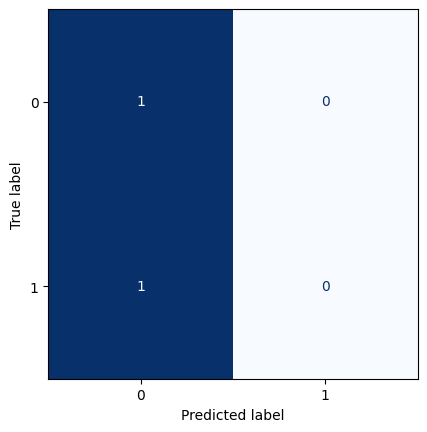

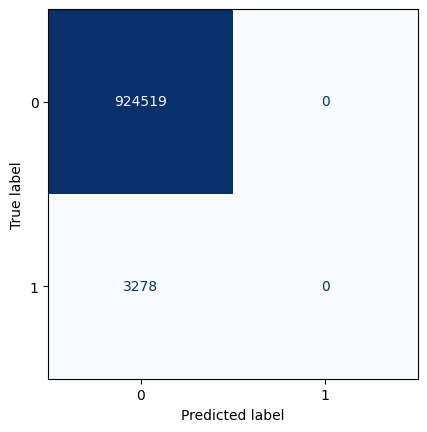

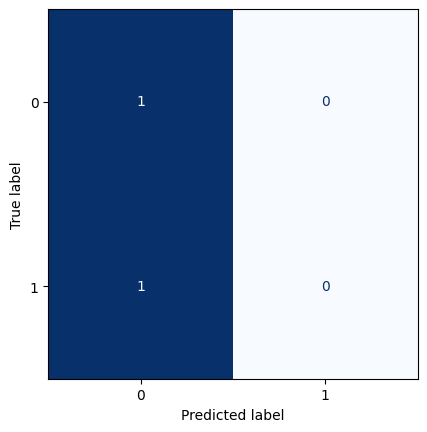

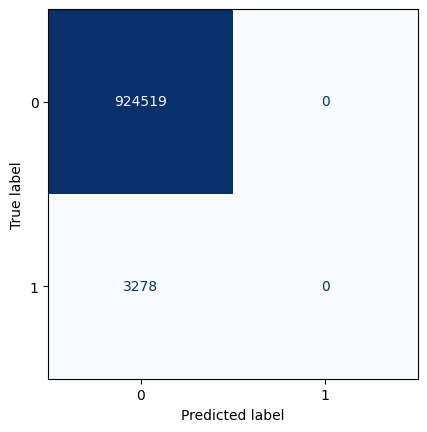

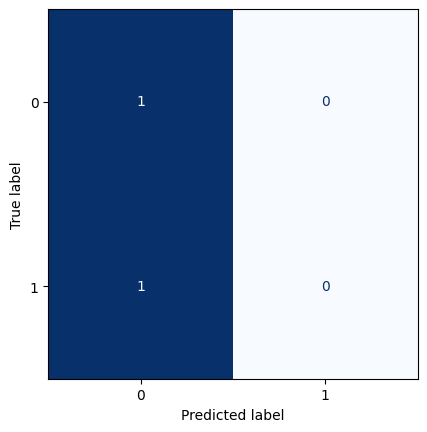

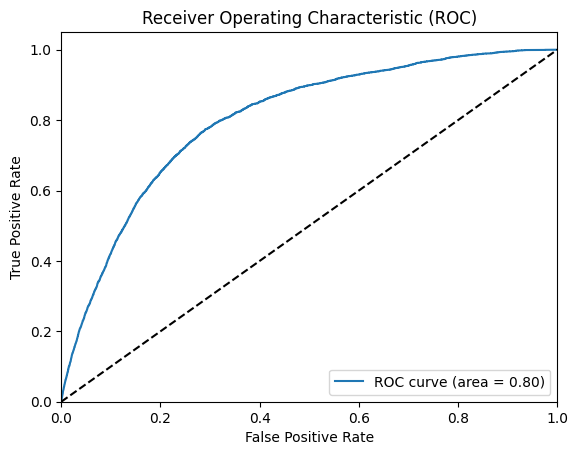

All zeros Brier score: 0.0035331004519307562
Model Brier score: 0.0035018422539714626


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.8s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 54 of 200building tree 53 of 200

building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.3min


building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.4s finished


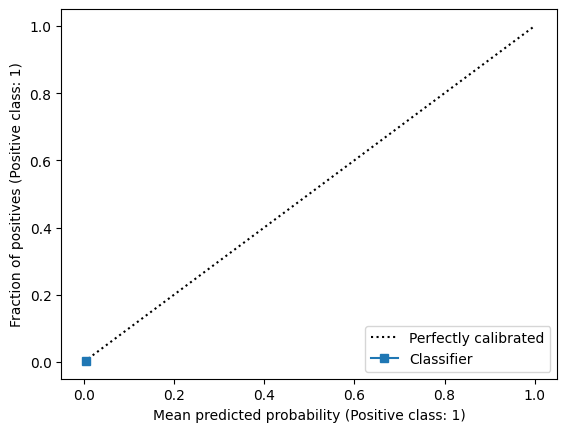

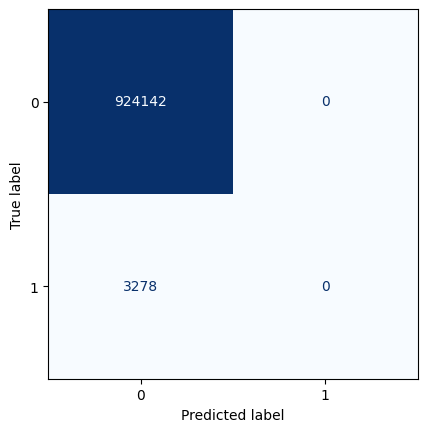

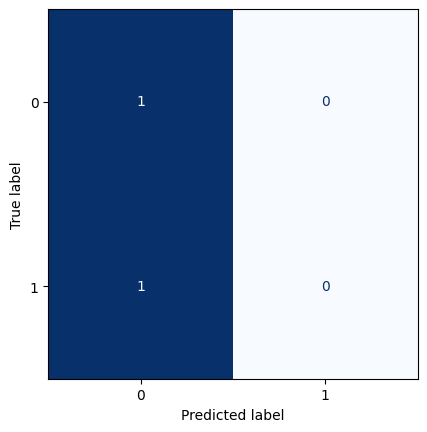

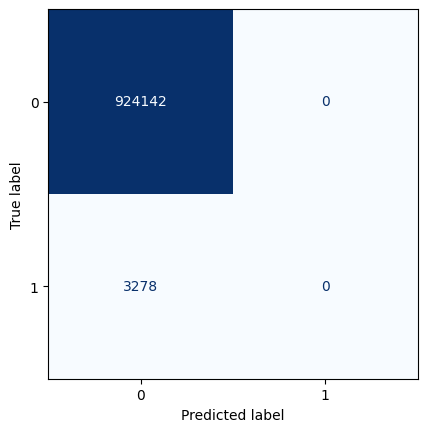

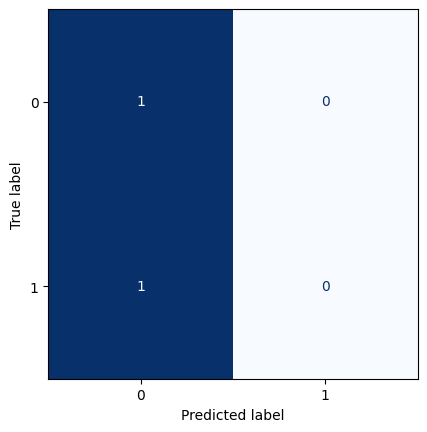

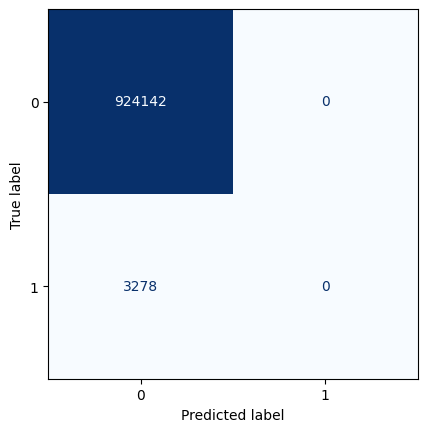

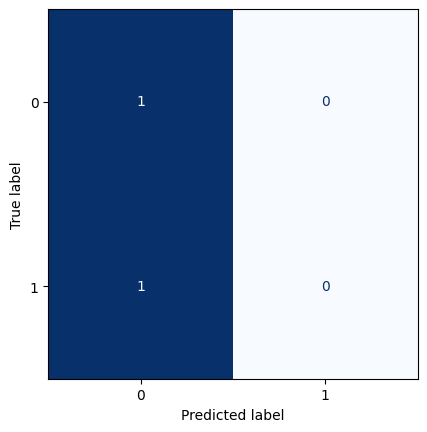

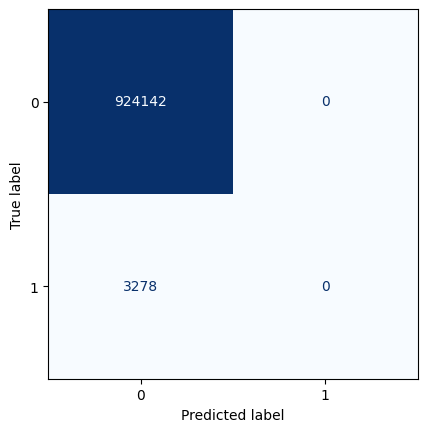

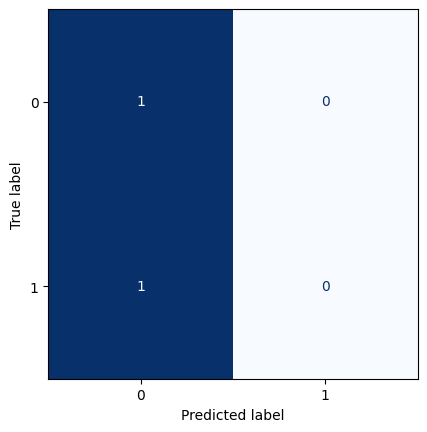

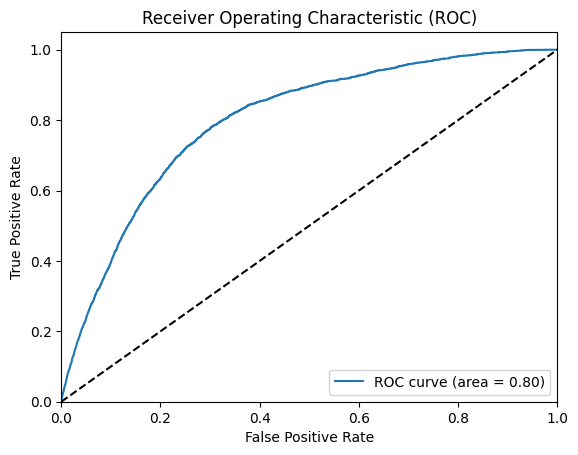

All zeros Brier score: 0.003534536671626663
Model Brier score: 0.0035045725820932625


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.8s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.2min


building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.4s finished


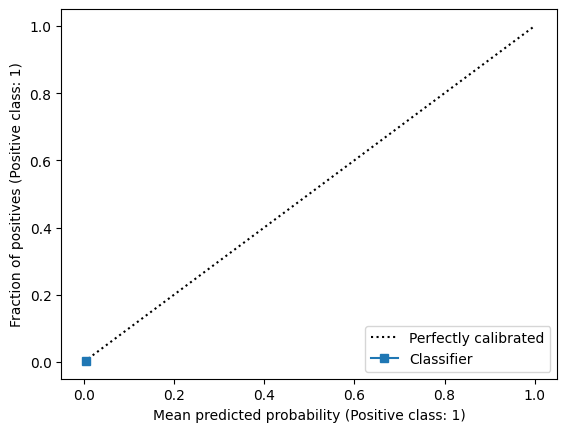

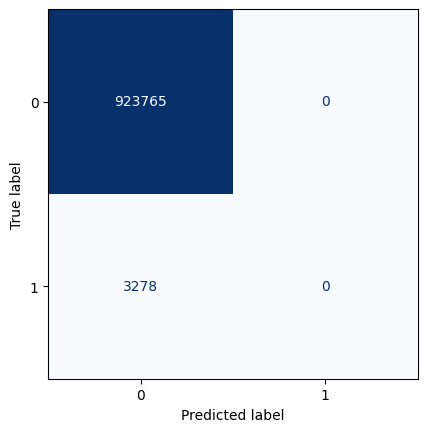

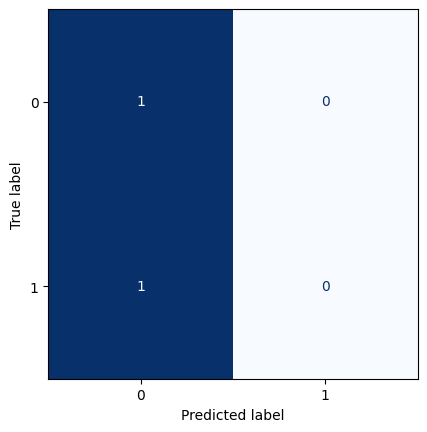

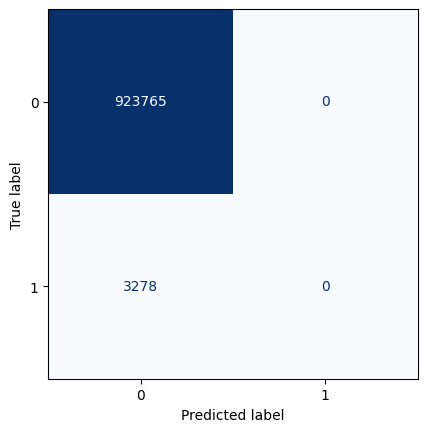

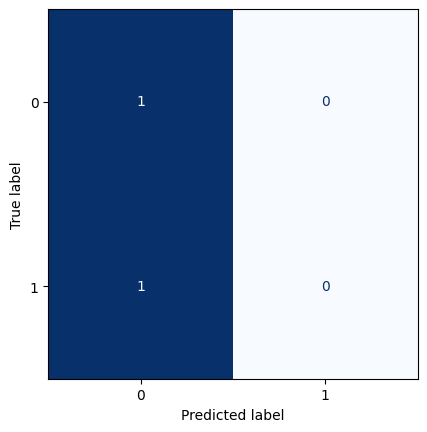

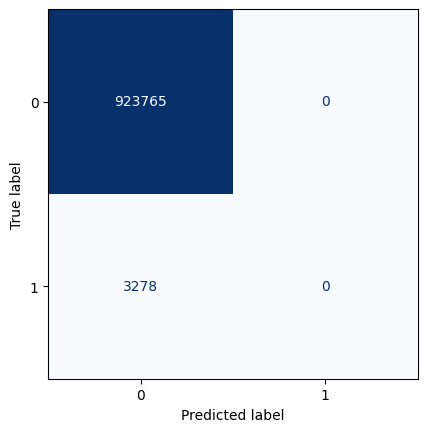

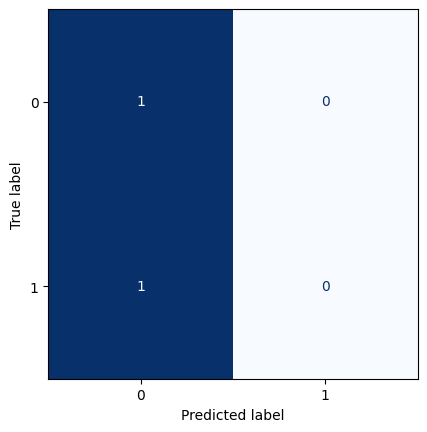

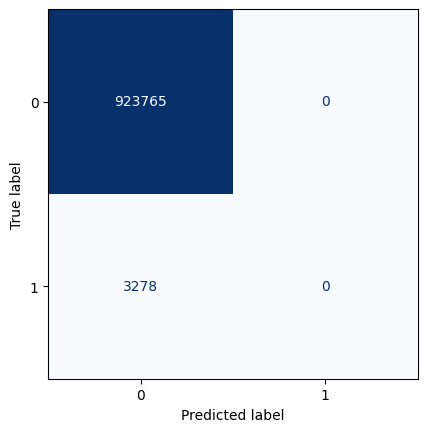

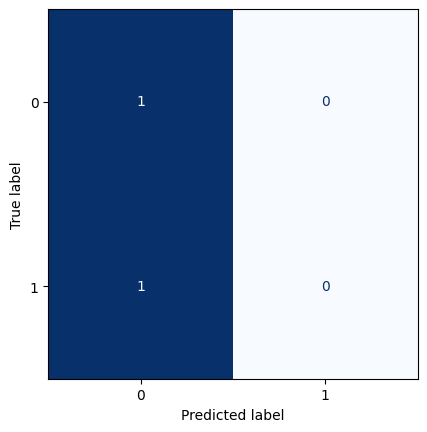

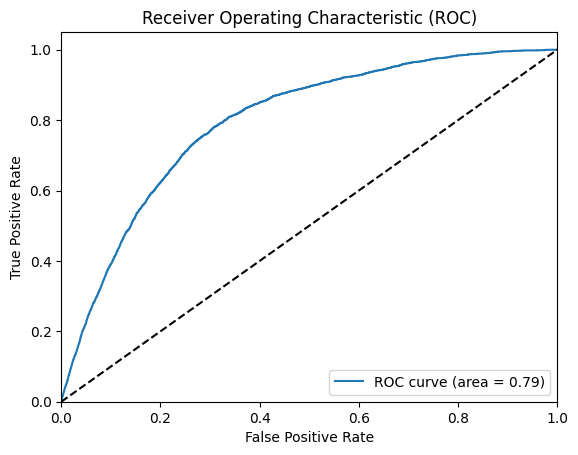

All zeros Brier score: 0.00353597405945571
Model Brier score: 0.0035068412592450366


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.7s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.3min


building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.6s finished


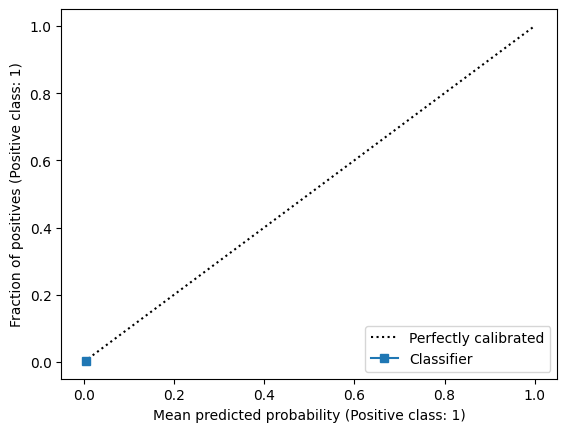

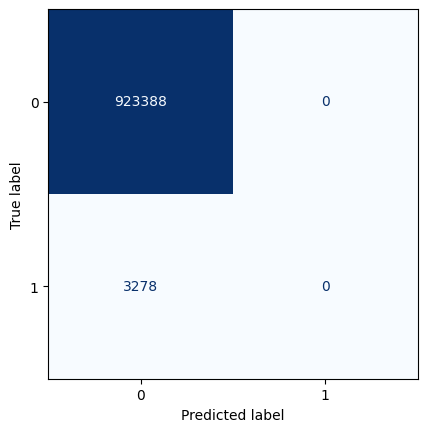

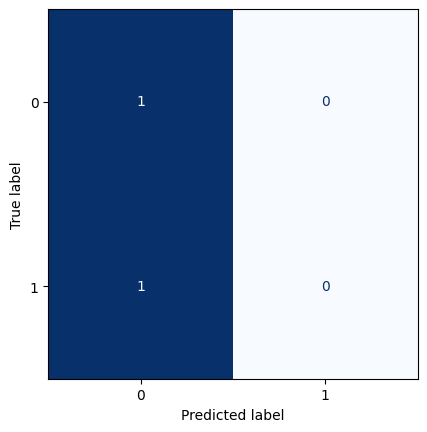

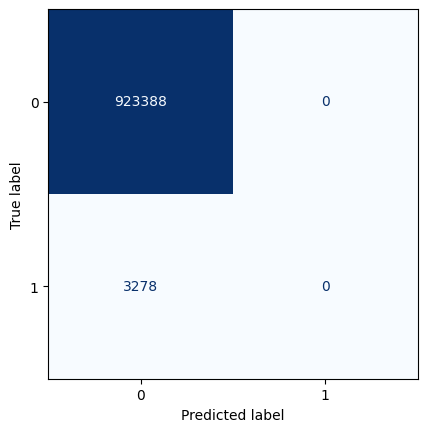

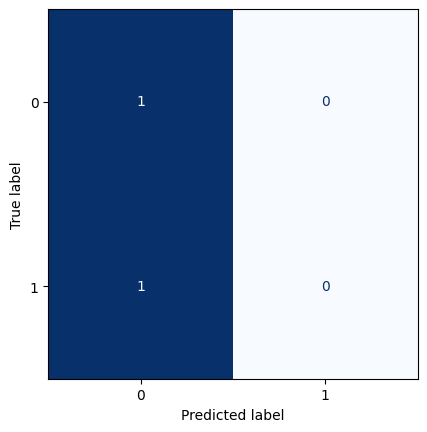

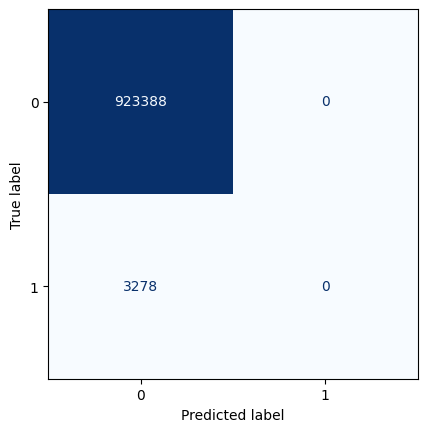

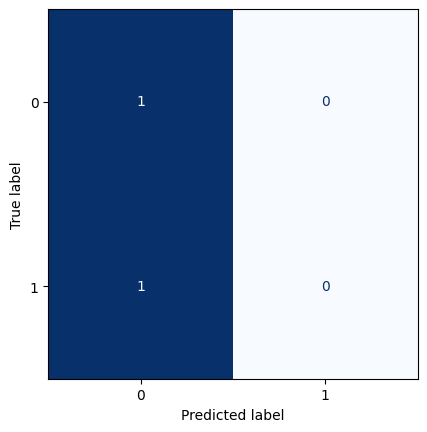

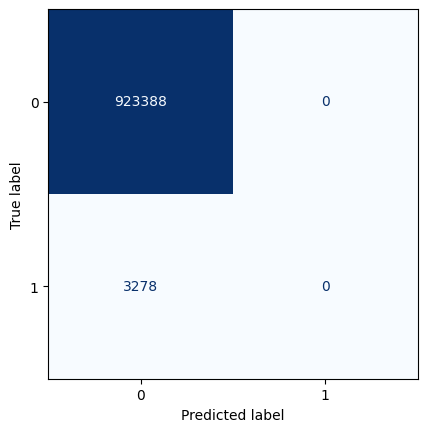

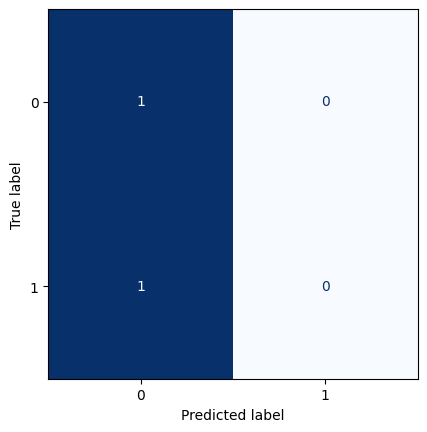

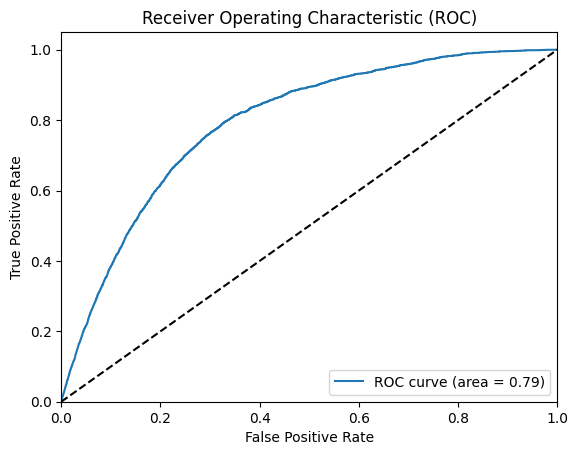

All zeros Brier score: 0.0035374126168436094
Model Brier score: 0.0035087300713630525


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200
building tree 3 of 200
building tree 4 of 200

building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200building tree 24 of 200



[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.1s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200building tree 39 of 200

building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.2min


building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.6s finished


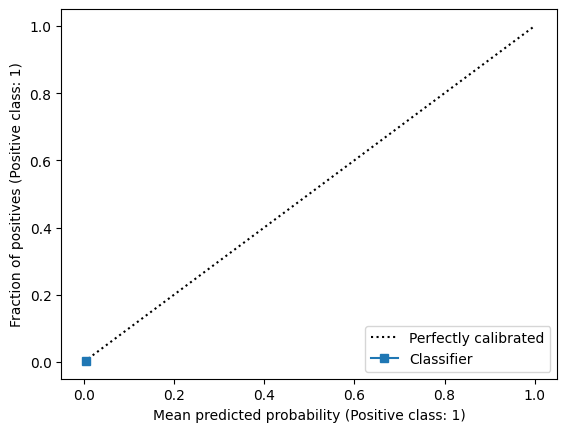

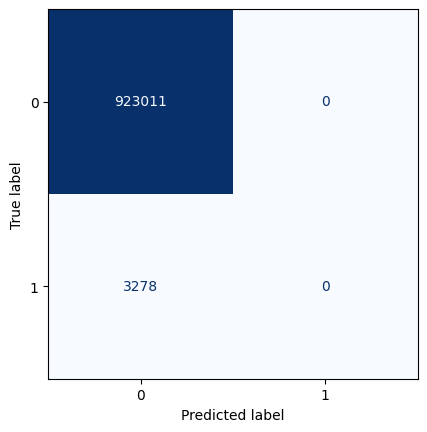

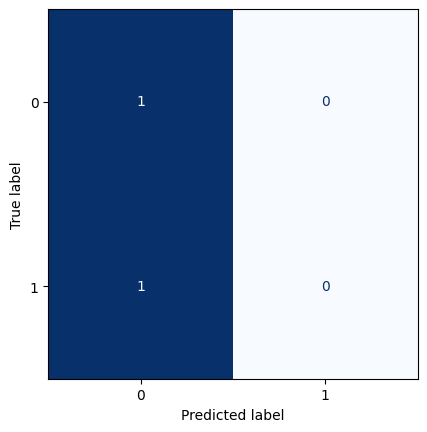

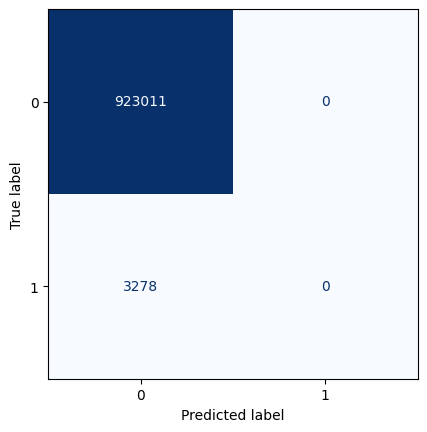

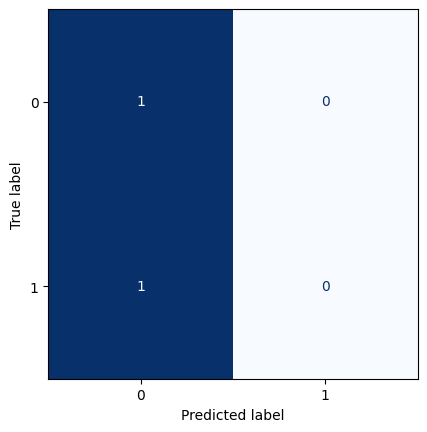

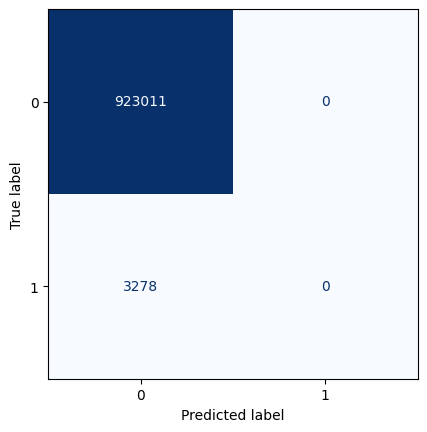

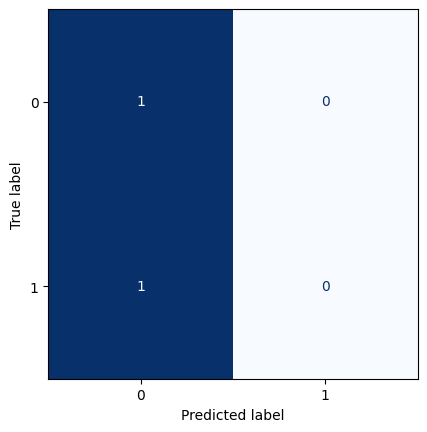

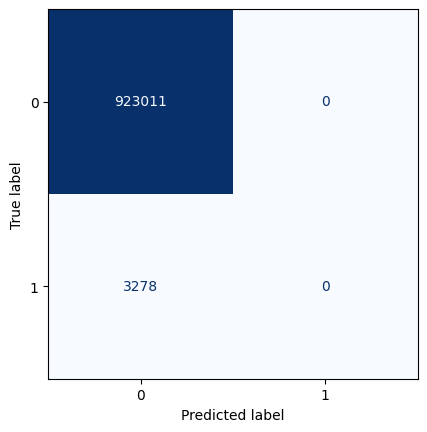

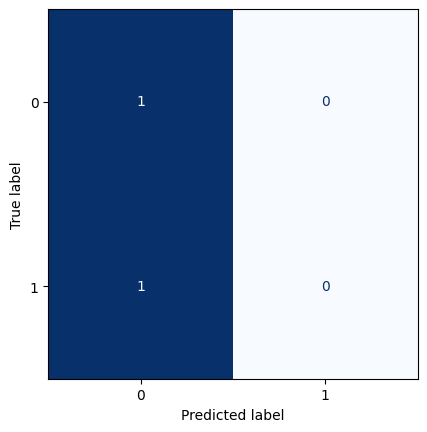

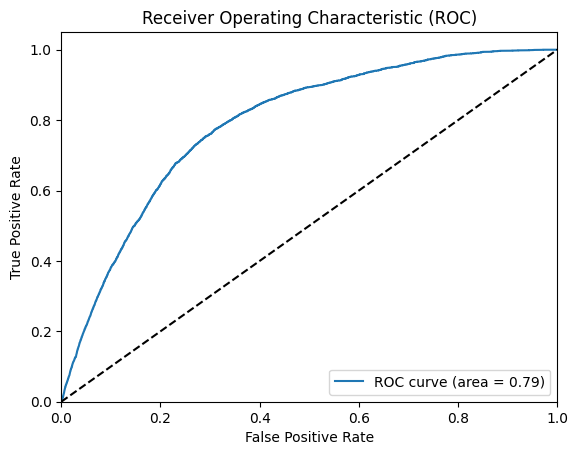

All zeros Brier score: 0.003538852345218393
Model Brier score: 0.0035106922542906104


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.2s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200building tree 30 of 200

building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200building tree 46 of 200

building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200building tree 62 of 200

building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.5min


building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.5s finished


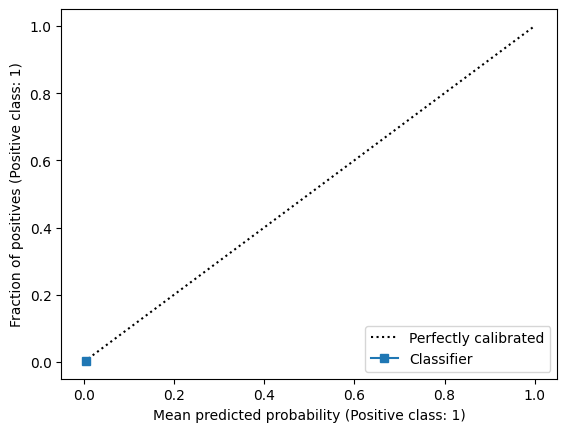

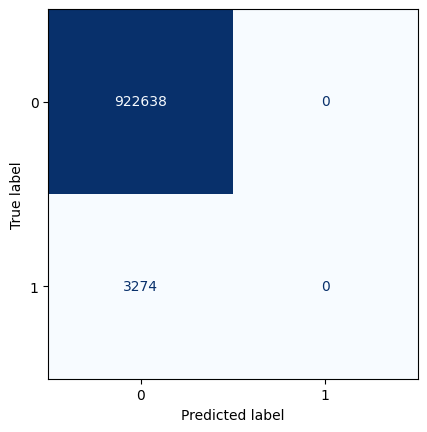

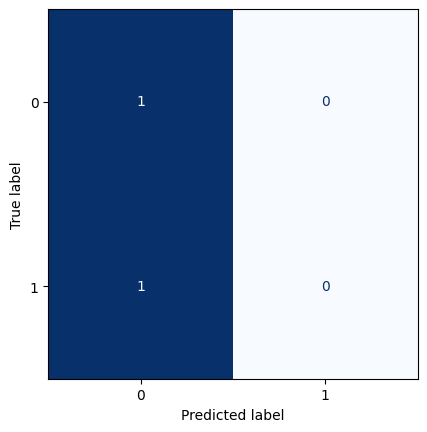

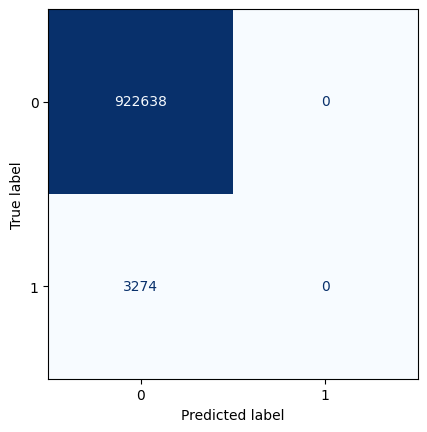

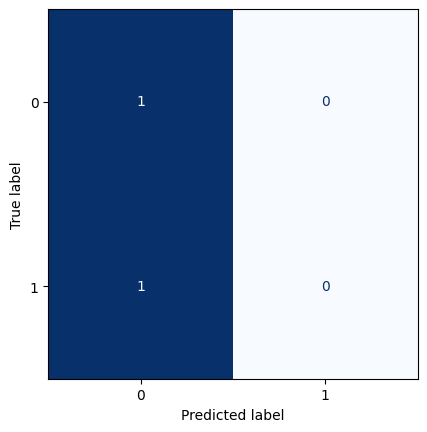

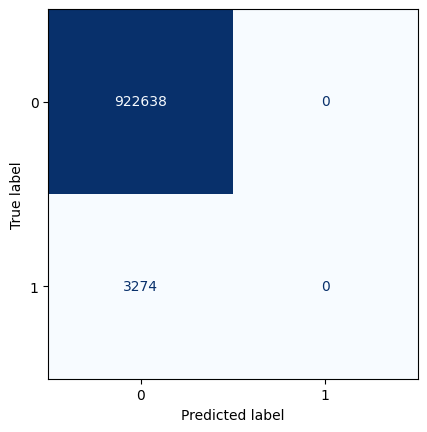

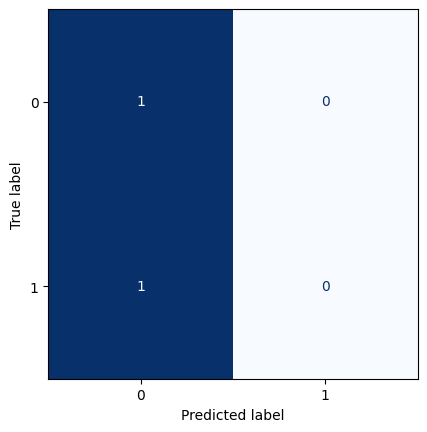

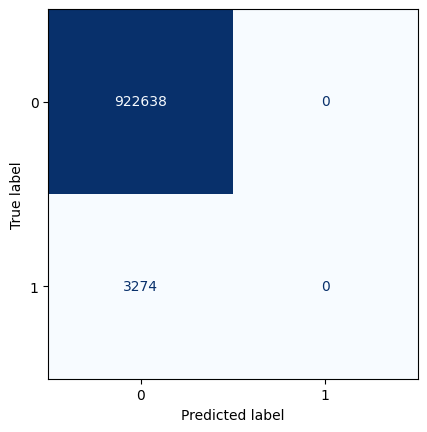

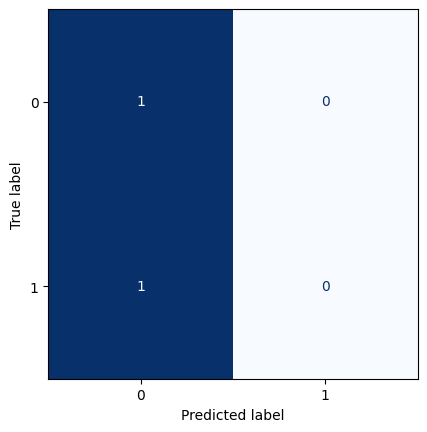

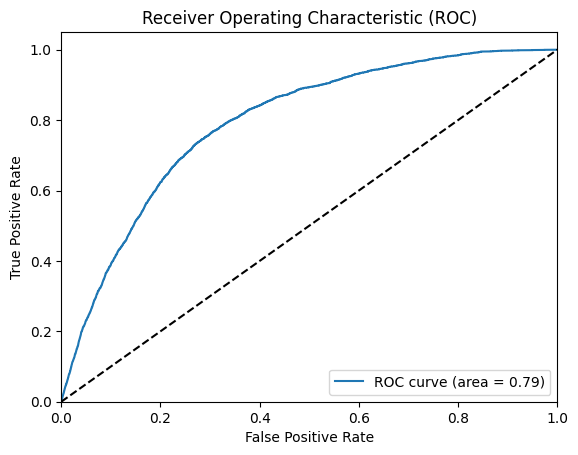

All zeros Brier score: 0.0035359731810366427
Model Brier score: 0.003507430673182536


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.0s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.1min


building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.4s finished


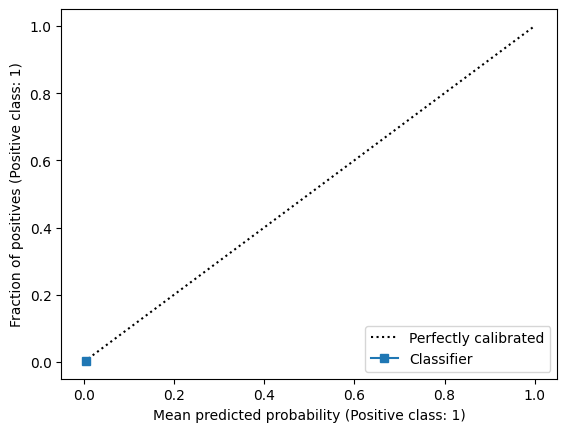

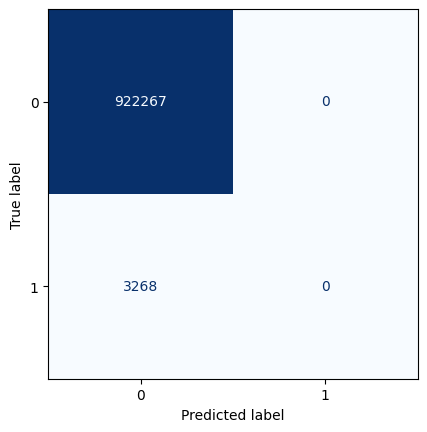

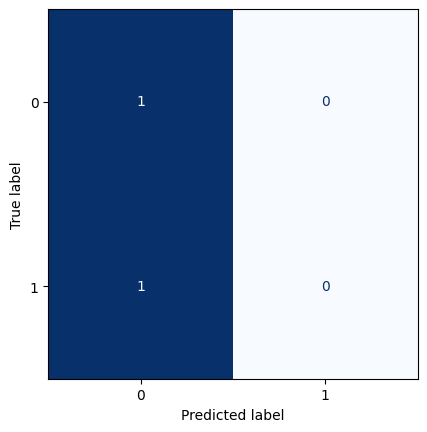

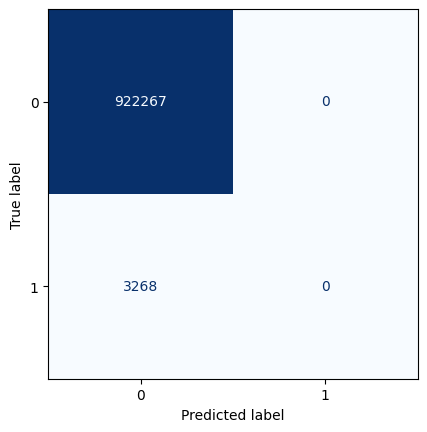

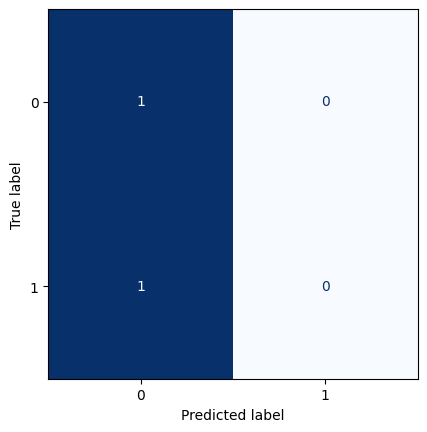

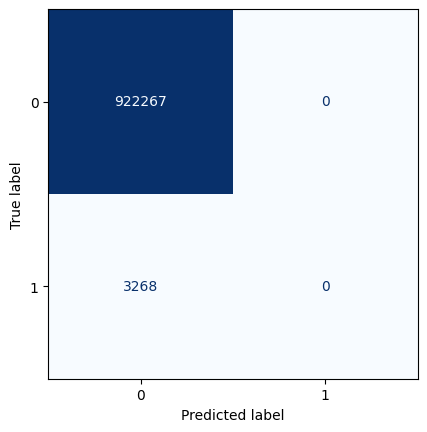

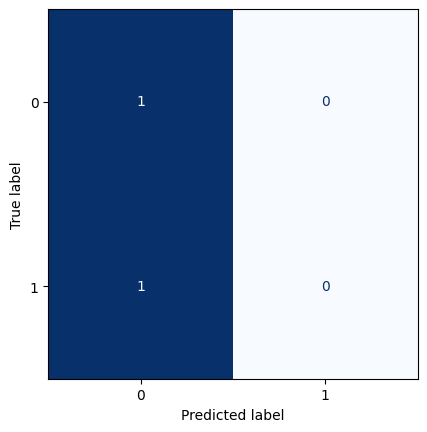

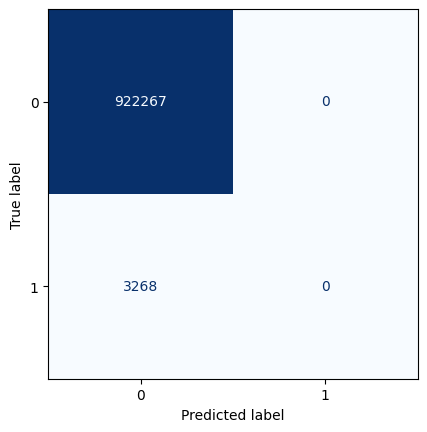

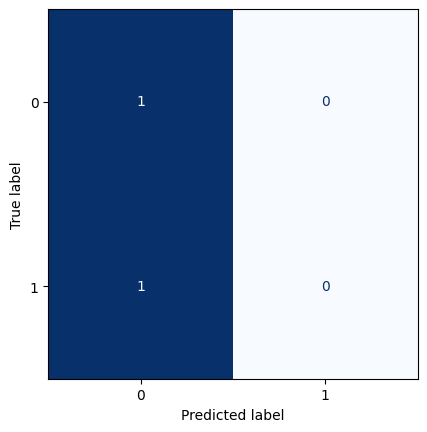

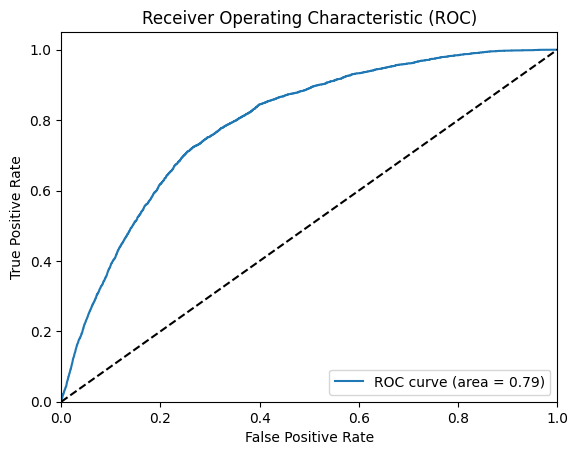

All zeros Brier score: 0.0035309307589664355
Model Brier score: 0.0035026199684007994


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200
building tree 3 of 200

building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.4s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200building tree 28 of 200

building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200building tree 41 of 200

building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.2min


building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200
building tree 161 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.4s finished


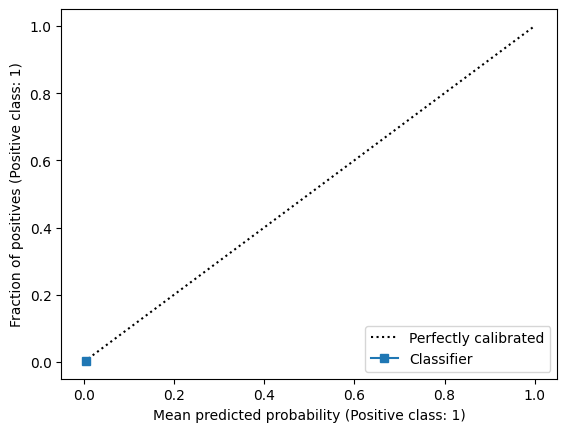

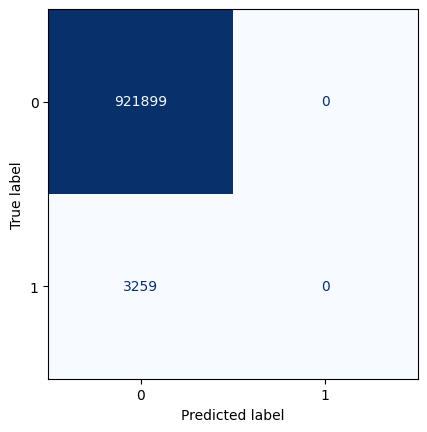

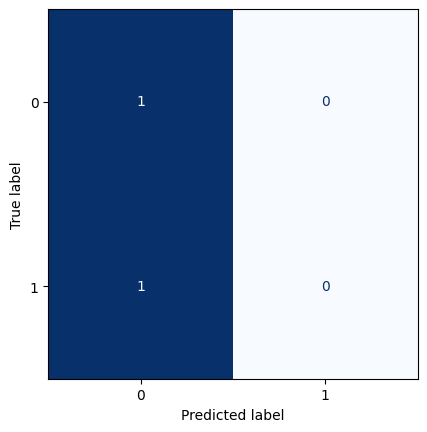

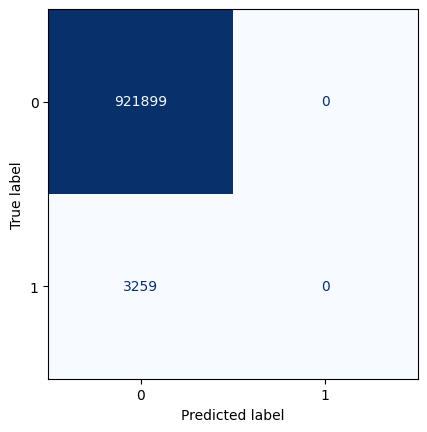

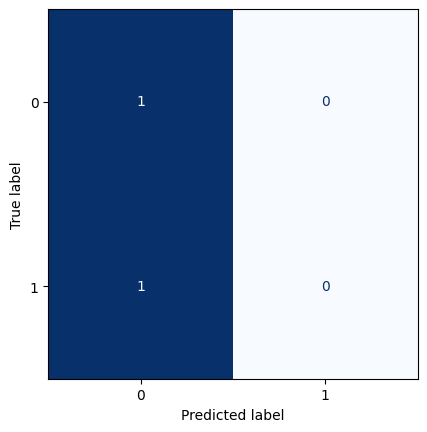

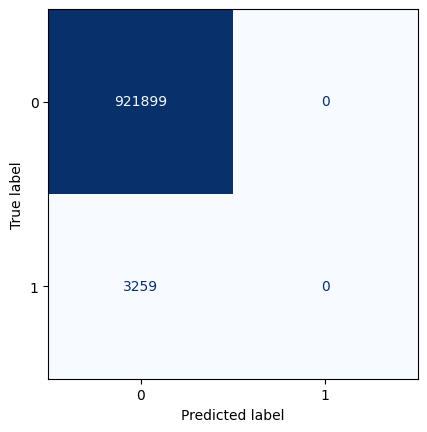

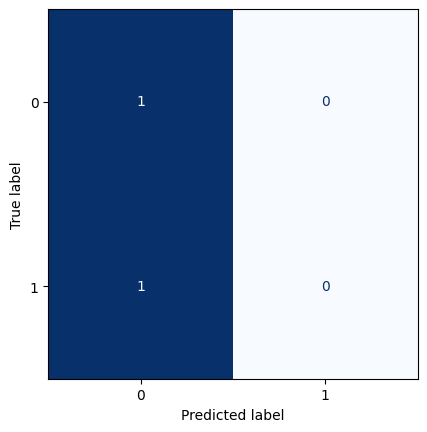

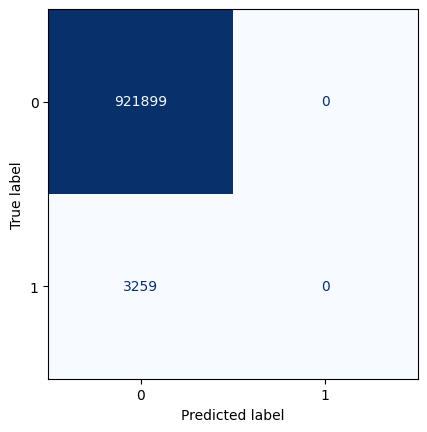

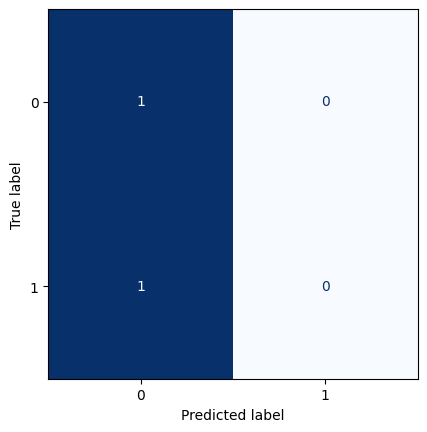

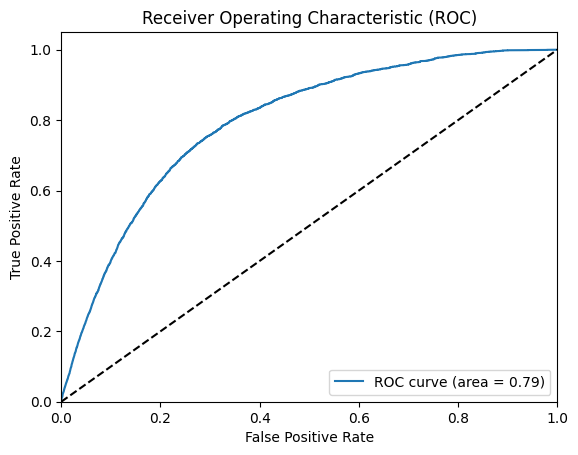

All zeros Brier score: 0.003522641537985944
Model Brier score: 0.0034939466380526736


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.1s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.2min


building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    2.6s finished


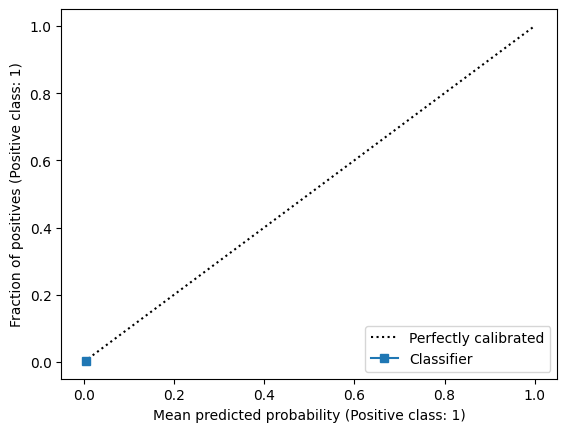

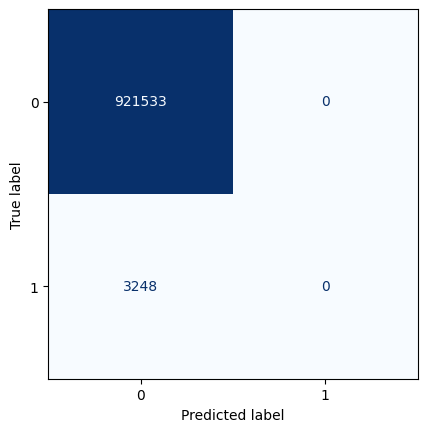

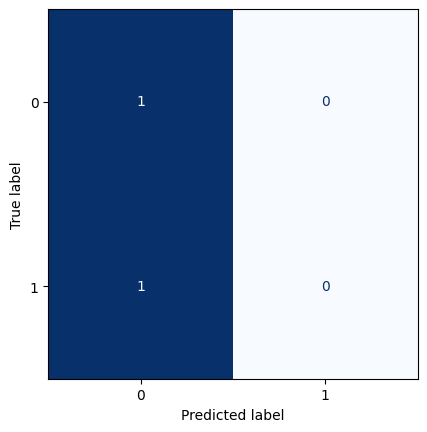

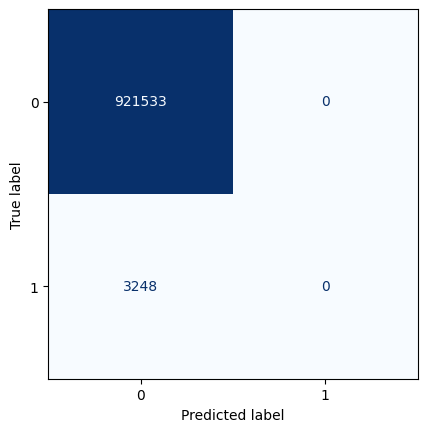

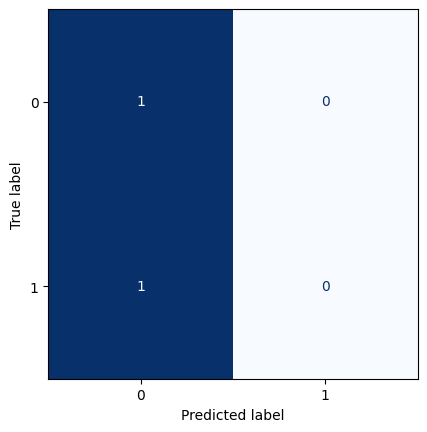

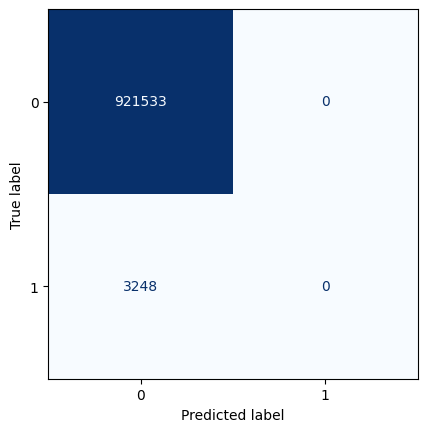

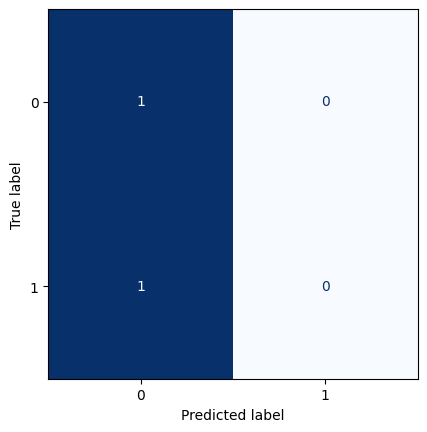

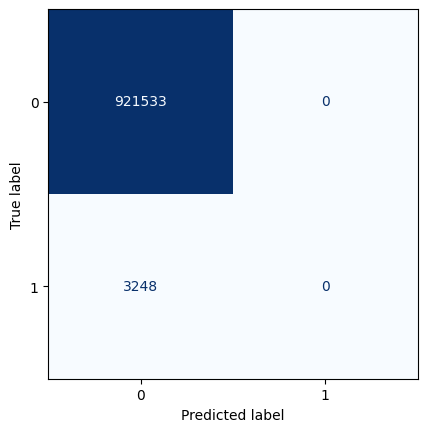

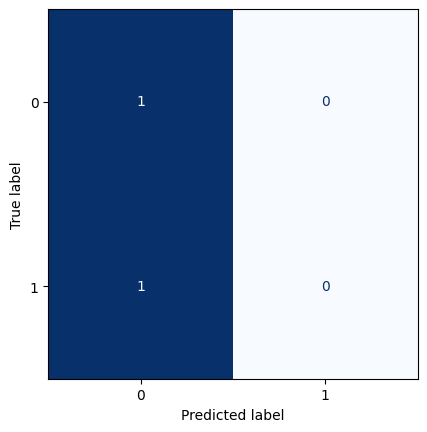

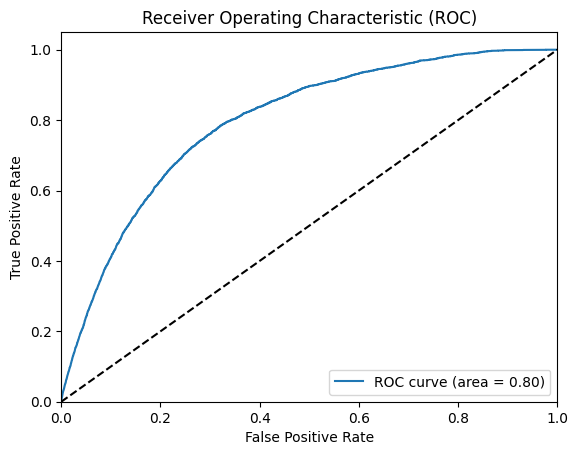

All zeros Brier score: 0.0035121828843801936
Model Brier score: 0.003483104082996946


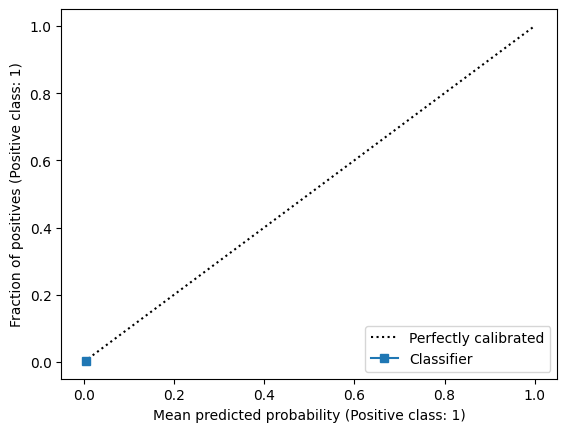

In [42]:
for lag in [1,2,3,4,5,6,7,8,9,10,11,12,13]:
    ### Model 
    
    clf = ExtraTreesClassifier(n_estimators=200, random_state=0, min_samples_leaf=1000, max_features='sqrt',n_jobs=-1,verbose=3)
    clf.fit(np.concatenate((x_train_scaled[:-lag*377],x_val_scaled[:-lag*377]),axis=0), np.concatenate((y_train[lag*377:],y_val[lag*377:]),axis=0))

    ### Confusion matrices
    t = clf.predict_proba(x_test_scaled[:-lag*377])
    t = t[:,1]

    ranges = [0.025,0.05,0.075,0.1]
    
    for j in ranges:
        classes = []
        for i in t:
            if i<=j: classes.append(0)
            else: classes.append(1)
    
        ConfusionMatrixDisplay(confusion_matrix(y_test[lag*377:], classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
        ConfusionMatrixDisplay(confusion_matrix(y_test[lag*377:], classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    
    ### ROC
    plot_roc(t,y_test[lag*377:])
    
    z = np.zeros((lag*377,1))
    tt = np.concatenate((t.reshape(-1,1),z))
    test['predictions_lag'+str(lag)] = tt.reshape(-1,1)
    test.to_csv("test_with_newTarget_predictions_RF_noOversampling.csv")
    
    ### calibration
    display = CalibrationDisplay.from_predictions(y_test[lag*377:], t, n_bins=10)
    print(f'All zeros Brier score: {brier_score_loss(y_test[lag*377:], np.zeros(len(y_test[lag*377:])))}')
    print(f'Model Brier score: {brier_score_loss(y_test[lag*377:], t)}')


#### Check

In [58]:
res = pd.read_csv('/Users/paolo/Documents/TC_old/new_results/test_with_newTarget_predictions_RF_noOversampling.csv')

score = np.average((res.new_target/100 - np.zeros(res.shape[0])) ** 2)
print(f'Brier score, all zeros: {score}\n')
for lag in range(14):
    if lag == 0:
        score = np.average((res.new_target/100 - res.predictions_lag0) ** 2)
    else:
        col = 'predictions_lag'+str(lag)
        score = np.average((res.new_target[377*lag:].values/100 - res[:-377*lag].loc[:,col].values)**2)
    
    print(f'Brier score, lag {lag}: {score}\n')
    print(f'Brier skill score, lag {lag}: {(0.0028244908639929586-score)/0.0028244908639929586}\n')
    

Brier score, all zeros: 0.0028828128596659927

Brier score, lag 0: 0.0024102470209509874

Brier skill score, lag 0: 0.14666142076181413

Brier score, lag 1: 0.0026368945179521923

Brier skill score, lag 1: 0.06641775635824254

Brier score, lag 2: 0.002802089745005199

Brier skill score, lag 2: 0.007931029012461205

Brier score, lag 3: 0.002842825096090518

Brier skill score, lag 3: -0.006491163533678632

Brier score, lag 4: 0.0028520533292636994

Brier skill score, lag 4: -0.009758383580599026

Brier score, lag 5: 0.002855356515560818

Brier skill score, lag 5: -0.010927863836041858

Brier score, lag 6: 0.002858014083214318

Brier skill score, lag 6: -0.01186876532288302

Brier score, lag 7: 0.002860081229294151

Brier skill score, lag 7: -0.012600630348960858

Brier score, lag 8: 0.002861704897721597

Brier skill score, lag 8: -0.013175483837830168

Brier score, lag 9: 0.002863345394560757

Brier skill score, lag 9: -0.013756295360385837

Brier score, lag 10: 0.002860333682588877

Bri

### AdaBoost

In [8]:
#n_trees: 50, learning_rate: 1.0, min_samples_split=1000
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
base = DecisionTreeClassifier(splitter='random', min_samples_split=1000, random_state=0)
clf = AdaBoostClassifier(base_estimator=base, n_estimators=50, random_state=0, learning_rate=1)
clf.fit(np.concatenate((x_train_scaled,x_val_scaled),axis=0), np.concatenate((y_train,y_val),axis=0))


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=1000,
                                                         random_state=0,
                                                         splitter='random'),
                   learning_rate=1, random_state=0)

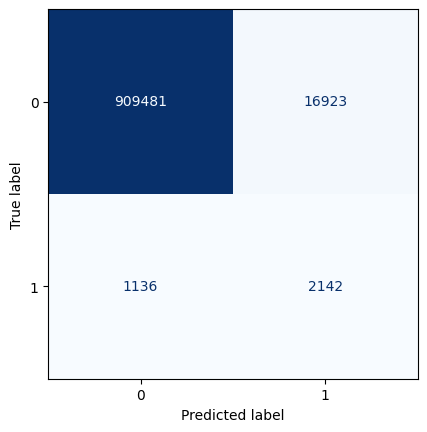

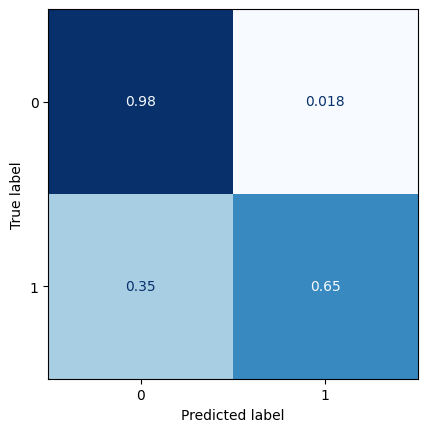

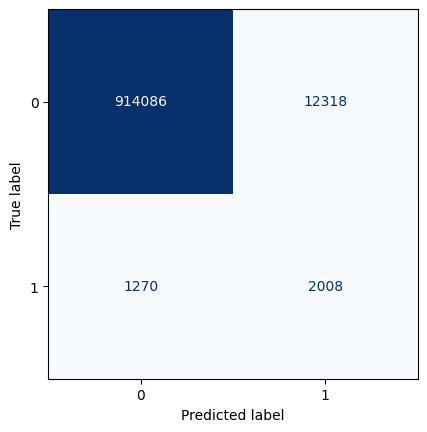

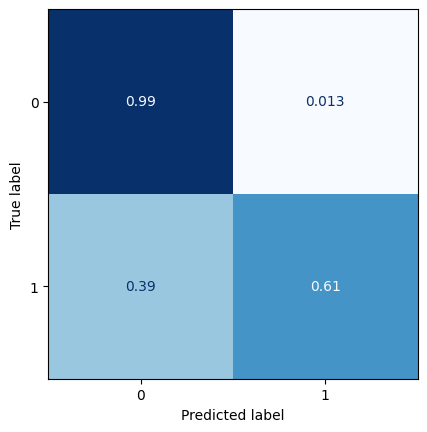

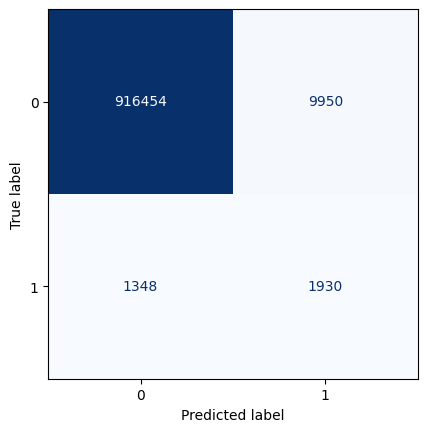

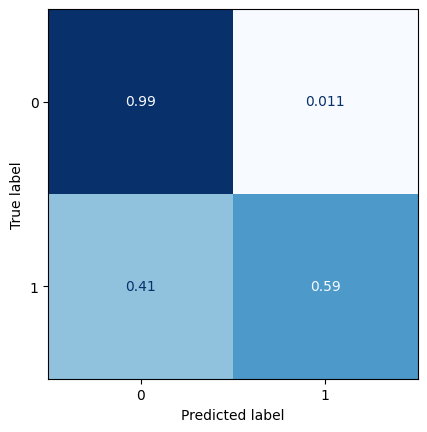

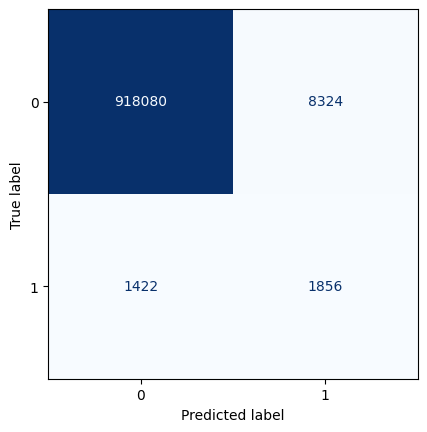

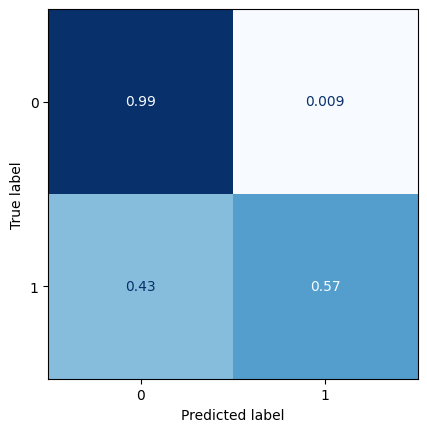

In [9]:
t = clf.predict_proba(x_test_scaled)
t = t[:,1]
ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t:
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test, classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test, classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    


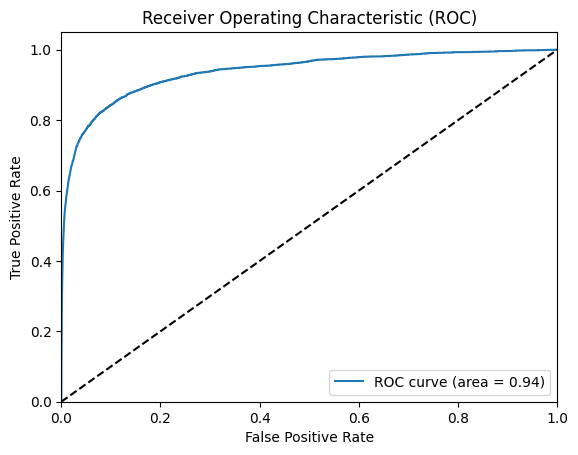

In [10]:
plot_roc(t,y_test)

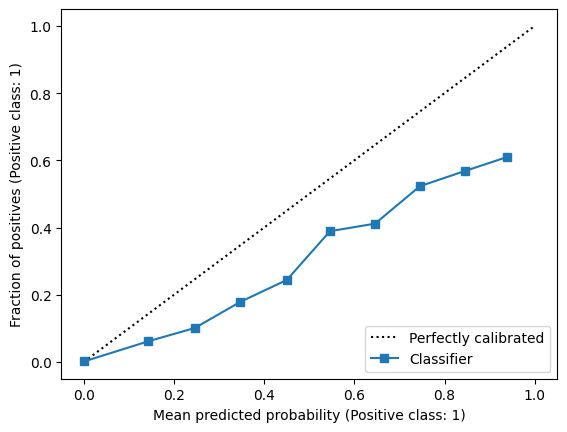

In [12]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(y_test, t, n_bins=10)


In [11]:
from sklearn.metrics import brier_score_loss
### brier score con probabilità predette

print(f'All zeros Brier score: {brier_score_loss(y_test, np.zeros(len(y_test)))}')
print(f'Model Brier score: {brier_score_loss(y_test, t)}')

All zeros Brier score: 0.0035259368257102965
Model Brier score: 0.003178262895162012


In [13]:
test = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/test_sets_withrealtom.csv')
test = test.loc[test.time>='2016-04-01']

In [14]:
test['predictions_lag0'] = t
test.to_csv("test_with_newTarget_predictions_AdaBoost_noOversampling.csv")
test = pd.read_csv('test_with_newTarget_predictions_AdaBoost_noOversampling.csv')

In [17]:
from sklearn.calibration import CalibrationDisplay
from sklearn.metrics import brier_score_loss


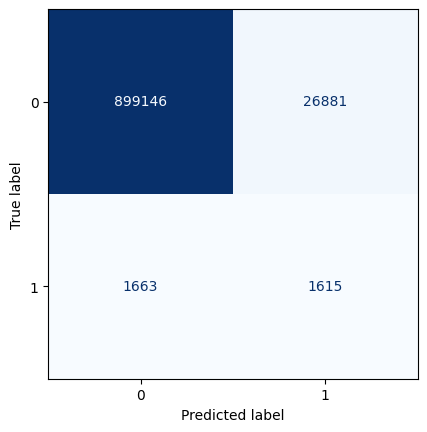

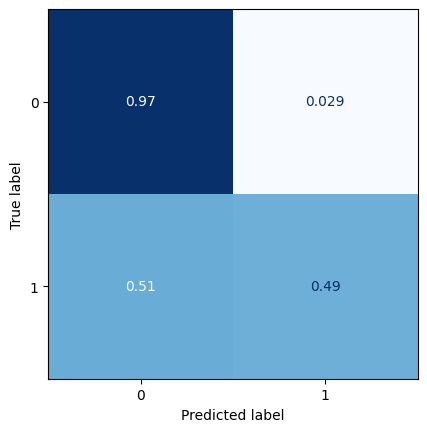

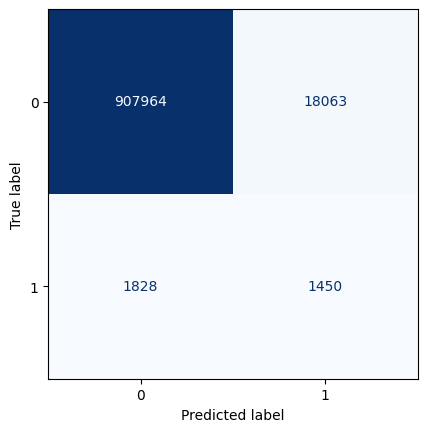

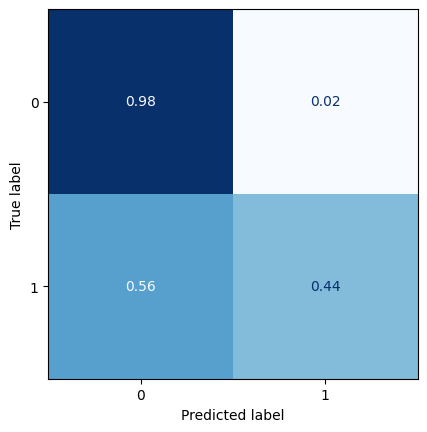

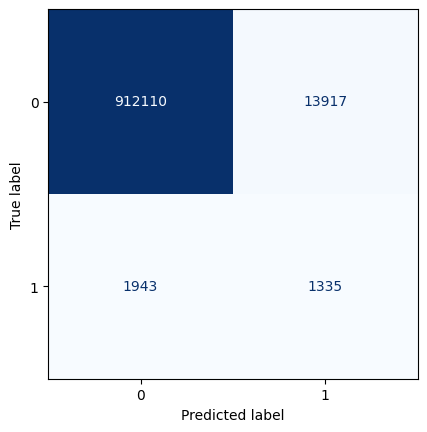

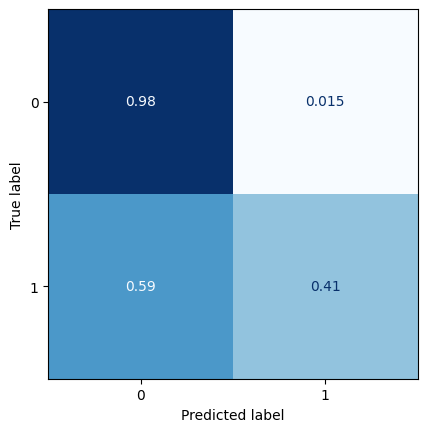

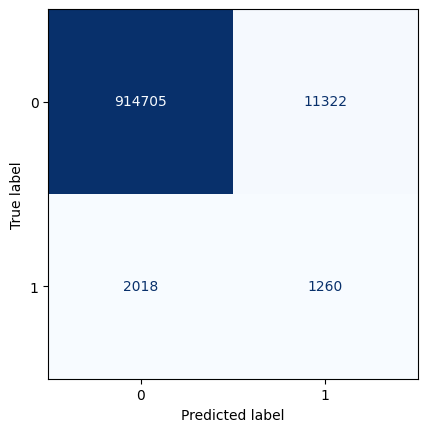

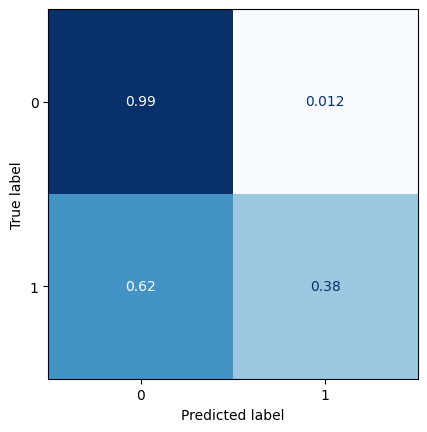

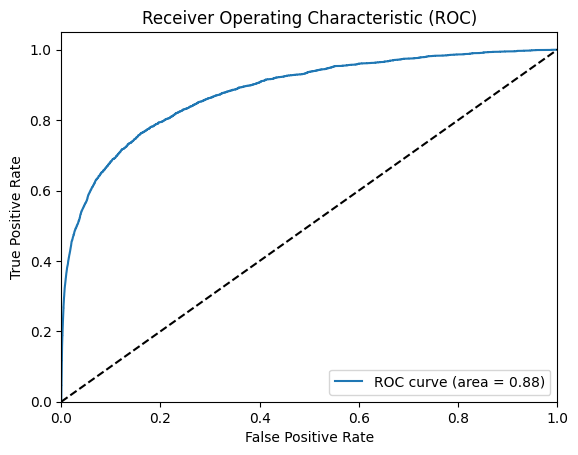

All zeros Brier score: 0.00352736722604527
Model Brier score: 0.0038512010546410914
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        time  latitude  longitude  \
0             0         34307       34307  2016-04-01       0.0       20.0   
1             1         34308       34308  2016-04-01       0.0       22.5   
2             2         34309       34309  2016-04-01       0.0       25.0   
3             3         34310       34310  2016-04-01       0.0       27.5   
4             4         34311       34311  2016-04-01       0.0       30.0   

         vo          r     u_200     u_850     v_200     v_850         ttr  \
0  0.000004  81.055560 -8.377182  5.273445  2.527817  2.160847 -171.625750   
1 -0.000002  76.221700 -6.143539  4.284462  4.278809  2.030232 -145.830180   
2  0.000018  75.465416 -1.724731  3.315552  3.811935  1.344738 -121.705734   
3 -0.000009  72.850200  1.577347  1.549385  4.243774  2.951813 -123.376850   
4 -0.000009  82.229460  1.983276  1.535709  5.736717  0.0

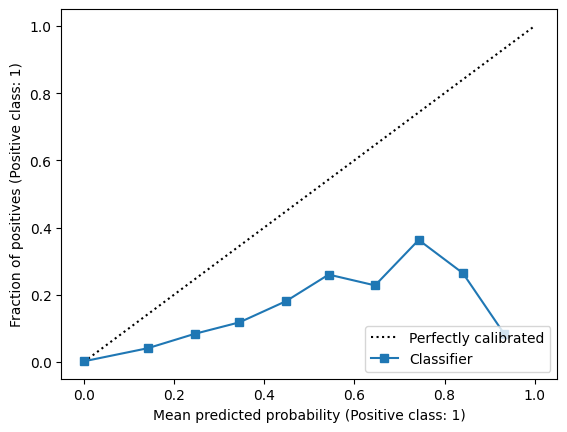

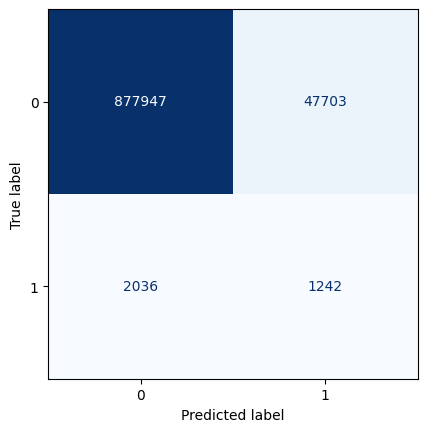

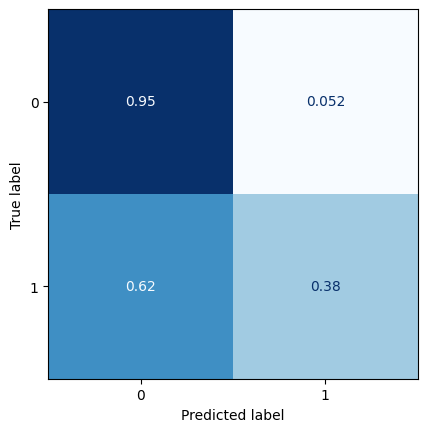

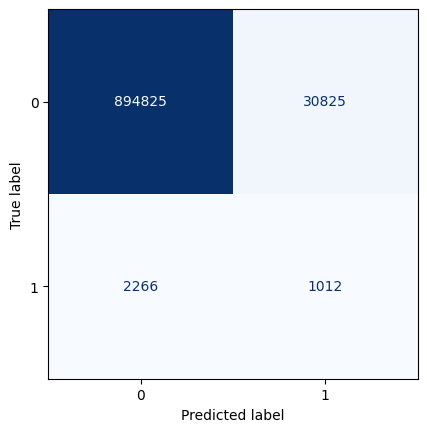

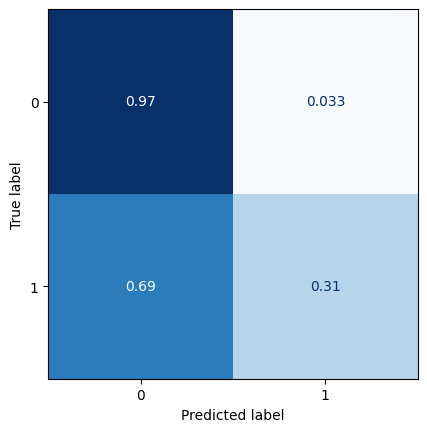

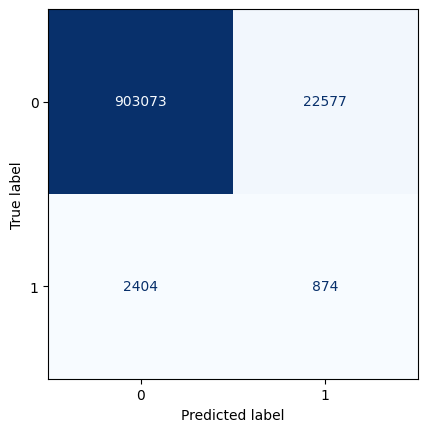

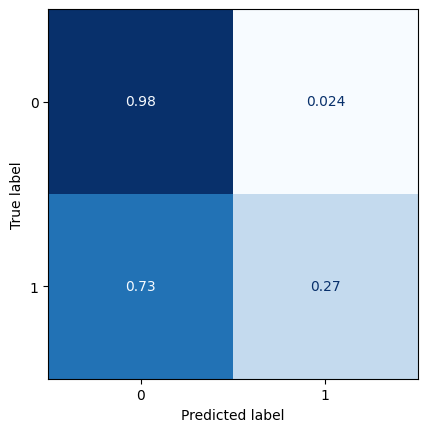

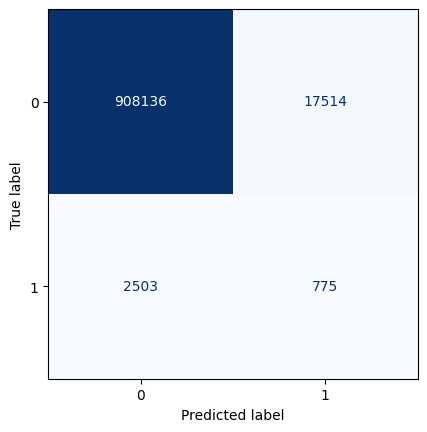

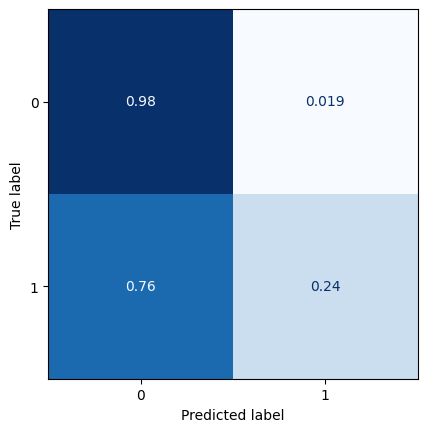

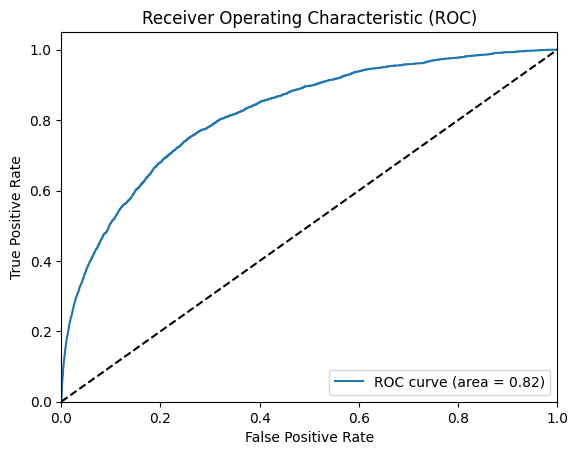

All zeros Brier score: 0.003528798787419477
Model Brier score: 0.004482942065674315
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        time  latitude  longitude  \
0             0         34307       34307  2016-04-01       0.0       20.0   
1             1         34308       34308  2016-04-01       0.0       22.5   
2             2         34309       34309  2016-04-01       0.0       25.0   
3             3         34310       34310  2016-04-01       0.0       27.5   
4             4         34311       34311  2016-04-01       0.0       30.0   

         vo          r     u_200     u_850     v_200     v_850         ttr  \
0  0.000004  81.055560 -8.377182  5.273445  2.527817  2.160847 -171.625750   
1 -0.000002  76.221700 -6.143539  4.284462  4.278809  2.030232 -145.830180   
2  0.000018  75.465416 -1.724731  3.315552  3.811935  1.344738 -121.705734   
3 -0.000009  72.850200  1.577347  1.549385  4.243774  2.951813 -123.376850   
4 -0.000009  82.229460  1.983276  1.535709  5.736717  0.0

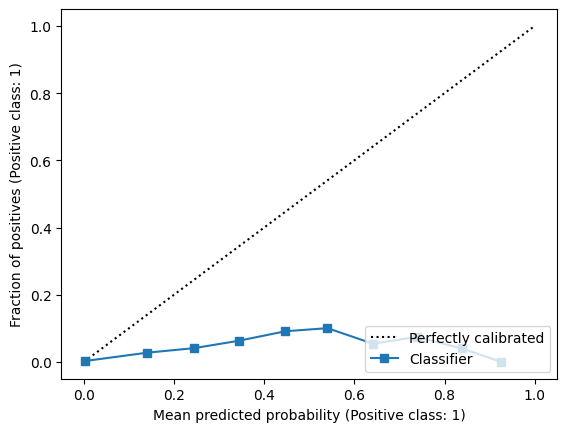

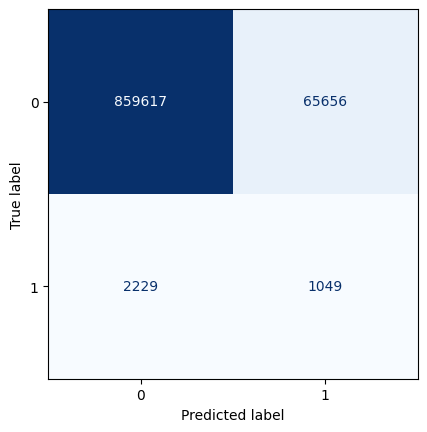

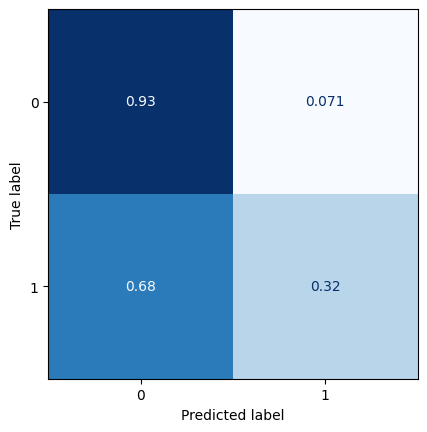

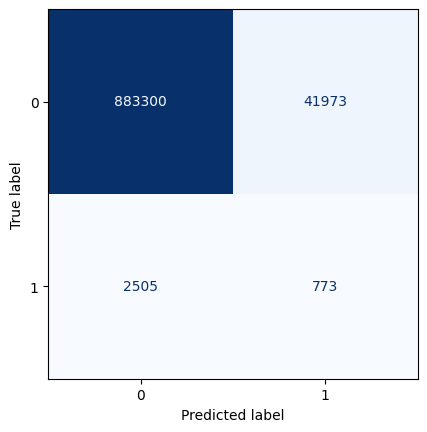

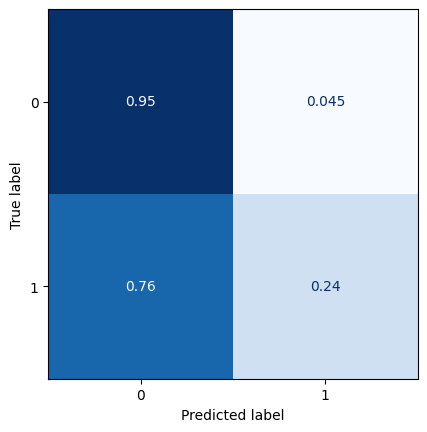

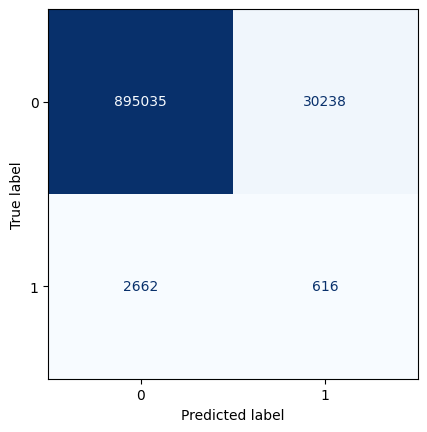

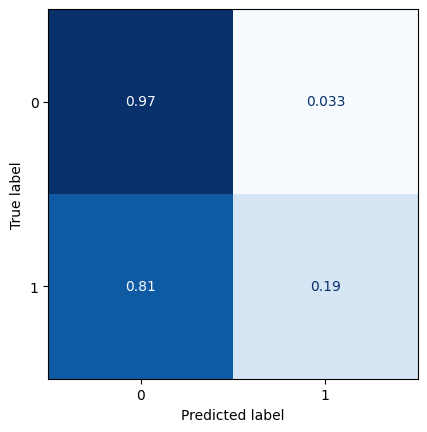

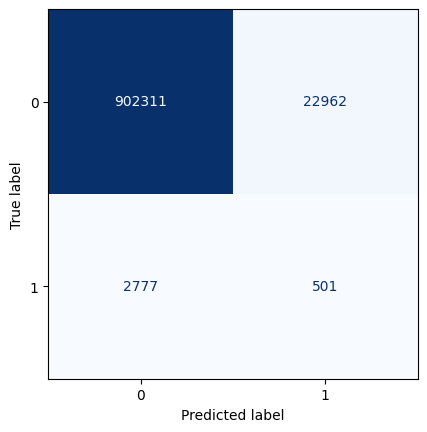

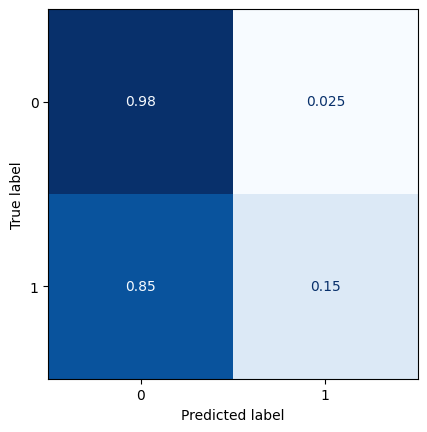

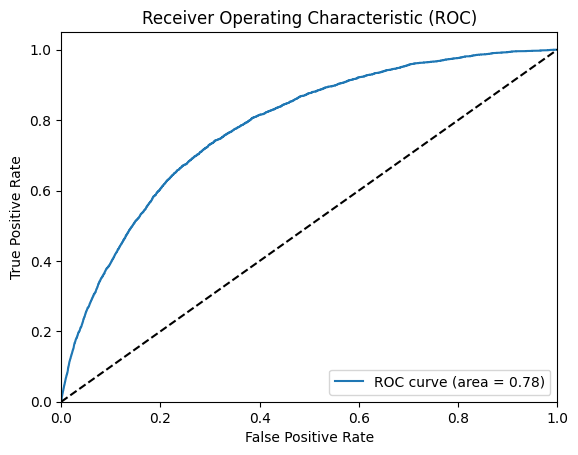

All zeros Brier score: 0.0035302315112470937
Model Brier score: 0.004860009531646328
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        time  latitude  longitude  \
0             0         34307       34307  2016-04-01       0.0       20.0   
1             1         34308       34308  2016-04-01       0.0       22.5   
2             2         34309       34309  2016-04-01       0.0       25.0   
3             3         34310       34310  2016-04-01       0.0       27.5   
4             4         34311       34311  2016-04-01       0.0       30.0   

         vo          r     u_200     u_850     v_200     v_850         ttr  \
0  0.000004  81.055560 -8.377182  5.273445  2.527817  2.160847 -171.625750   
1 -0.000002  76.221700 -6.143539  4.284462  4.278809  2.030232 -145.830180   
2  0.000018  75.465416 -1.724731  3.315552  3.811935  1.344738 -121.705734   
3 -0.000009  72.850200  1.577347  1.549385  4.243774  2.951813 -123.376850   
4 -0.000009  82.229460  1.983276  1.535709  5.736717  0.

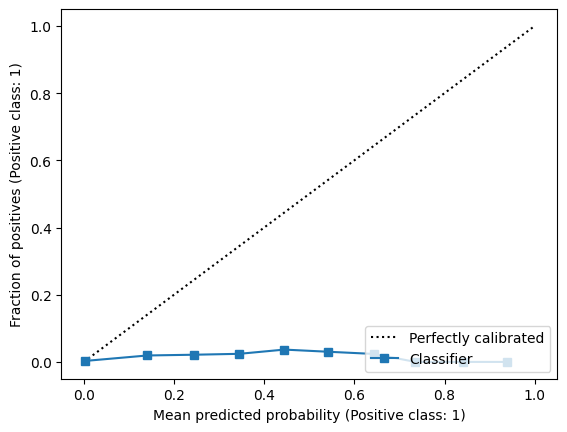

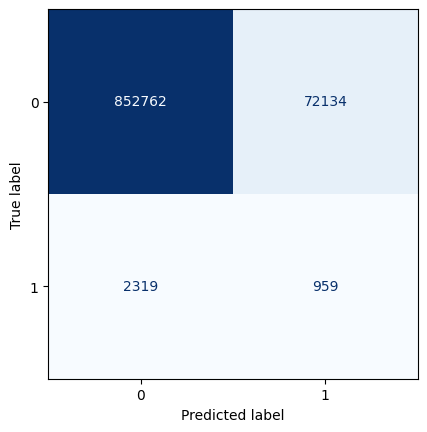

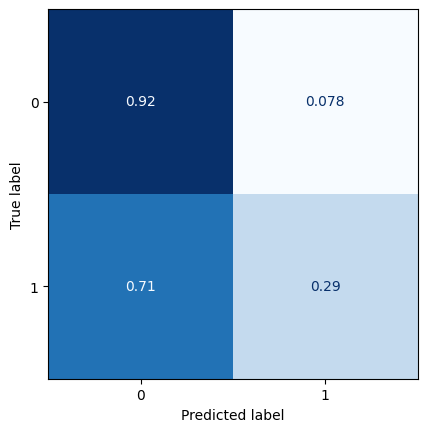

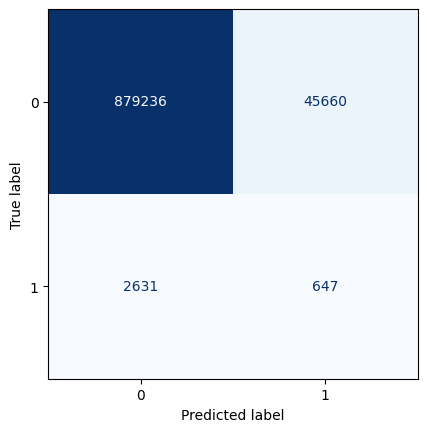

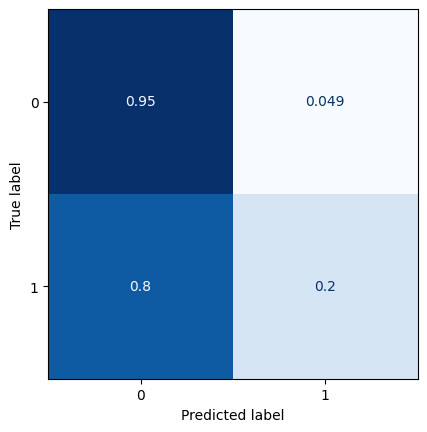

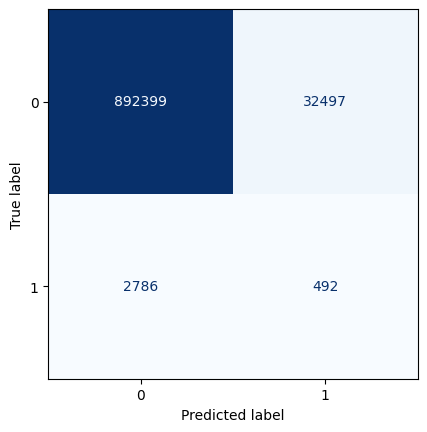

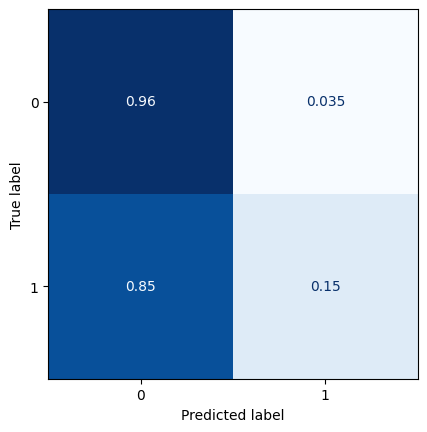

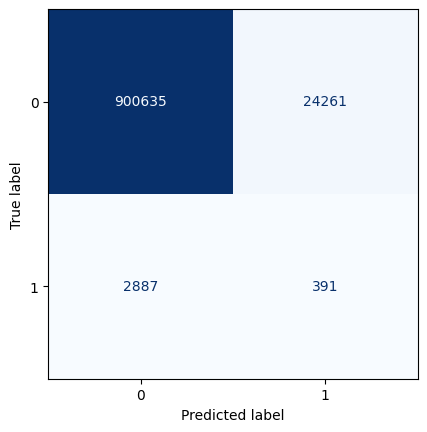

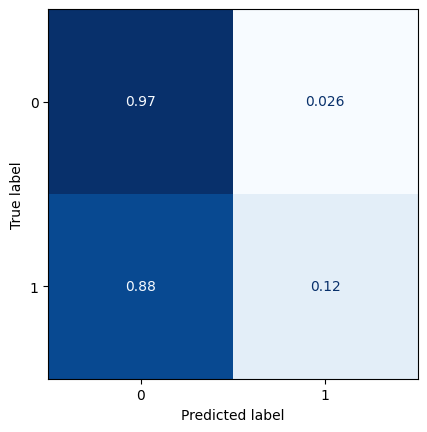

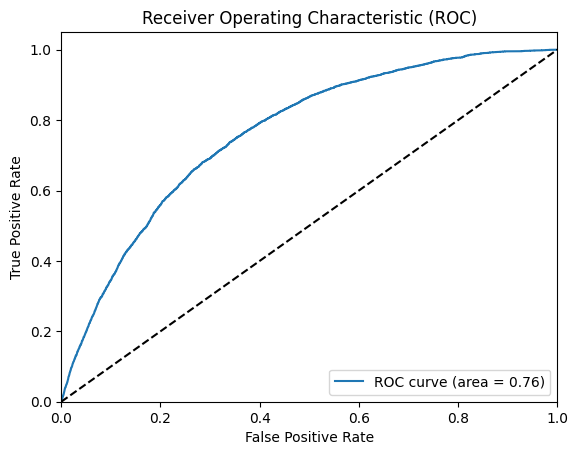

All zeros Brier score: 0.0035316653989445946
Model Brier score: 0.004900006521815079
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        time  latitude  longitude  \
0             0         34307       34307  2016-04-01       0.0       20.0   
1             1         34308       34308  2016-04-01       0.0       22.5   
2             2         34309       34309  2016-04-01       0.0       25.0   
3             3         34310       34310  2016-04-01       0.0       27.5   
4             4         34311       34311  2016-04-01       0.0       30.0   

         vo          r     u_200     u_850     v_200     v_850         ttr  \
0  0.000004  81.055560 -8.377182  5.273445  2.527817  2.160847 -171.625750   
1 -0.000002  76.221700 -6.143539  4.284462  4.278809  2.030232 -145.830180   
2  0.000018  75.465416 -1.724731  3.315552  3.811935  1.344738 -121.705734   
3 -0.000009  72.850200  1.577347  1.549385  4.243774  2.951813 -123.376850   
4 -0.000009  82.229460  1.983276  1.535709  5.736717  0.

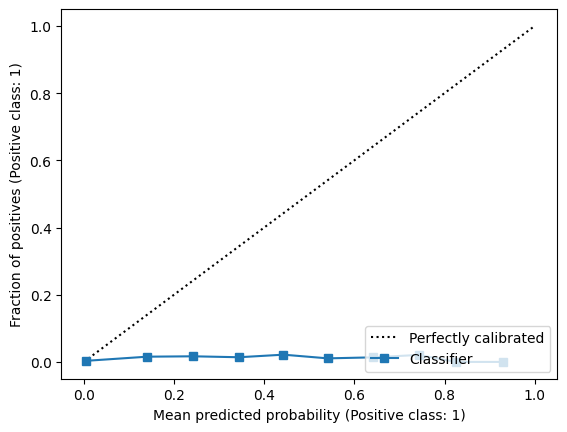

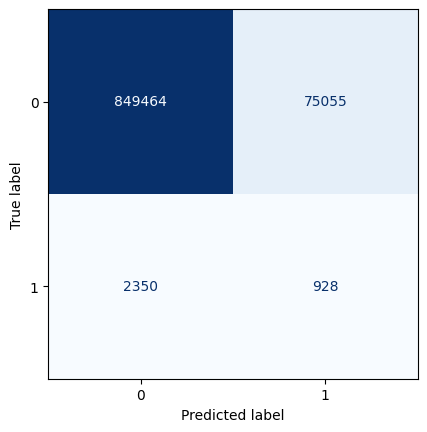

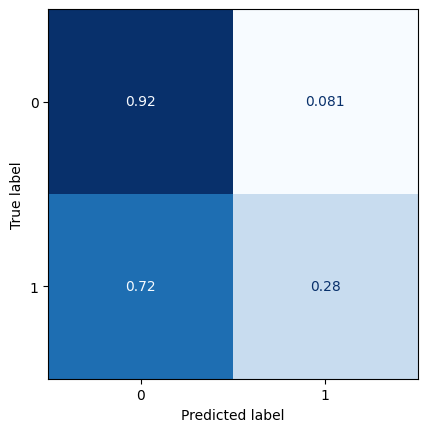

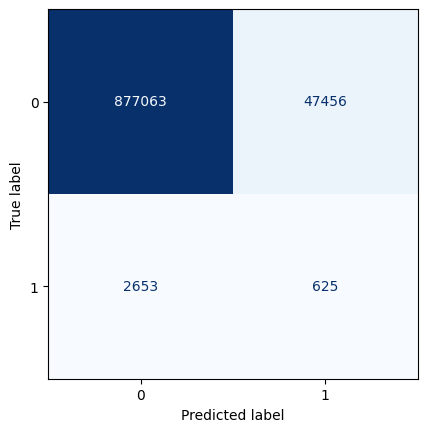

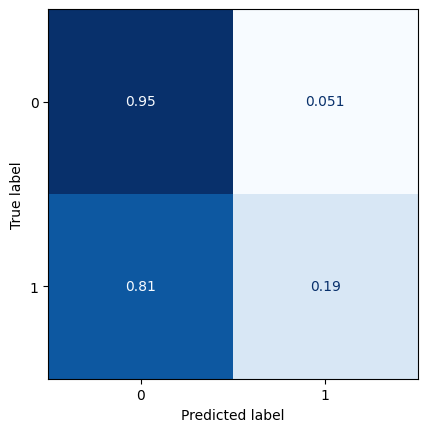

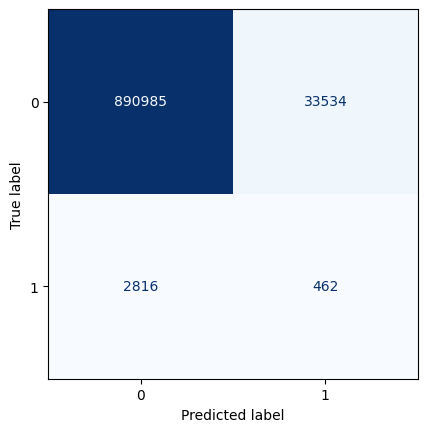

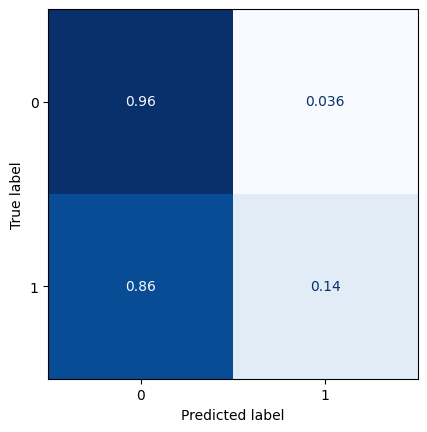

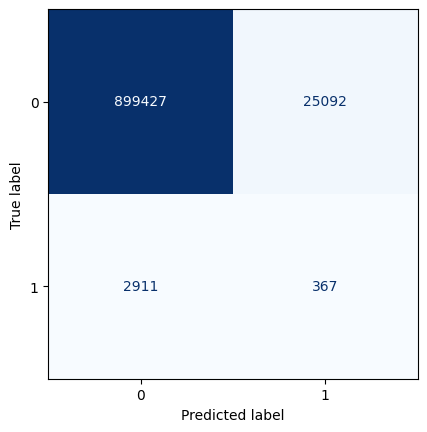

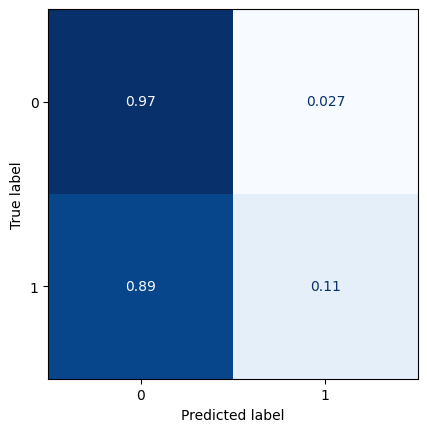

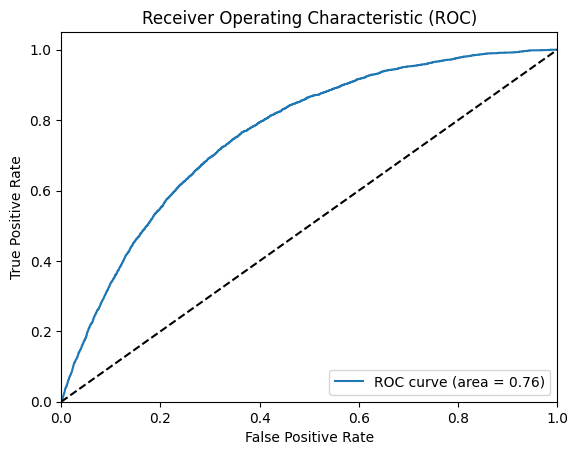

All zeros Brier score: 0.0035331004519307562
Model Brier score: 0.004925795186522049
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        time  latitude  longitude  \
0             0         34307       34307  2016-04-01       0.0       20.0   
1             1         34308       34308  2016-04-01       0.0       22.5   
2             2         34309       34309  2016-04-01       0.0       25.0   
3             3         34310       34310  2016-04-01       0.0       27.5   
4             4         34311       34311  2016-04-01       0.0       30.0   

         vo          r     u_200     u_850     v_200     v_850         ttr  \
0  0.000004  81.055560 -8.377182  5.273445  2.527817  2.160847 -171.625750   
1 -0.000002  76.221700 -6.143539  4.284462  4.278809  2.030232 -145.830180   
2  0.000018  75.465416 -1.724731  3.315552  3.811935  1.344738 -121.705734   
3 -0.000009  72.850200  1.577347  1.549385  4.243774  2.951813 -123.376850   
4 -0.000009  82.229460  1.983276  1.535709  5.736717  0.

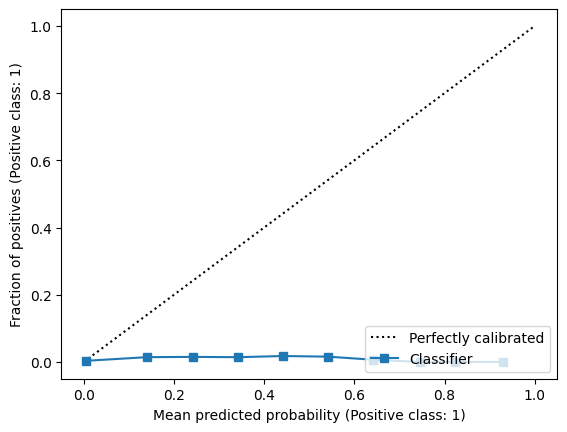

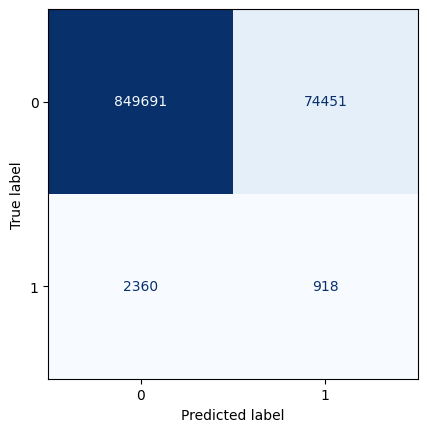

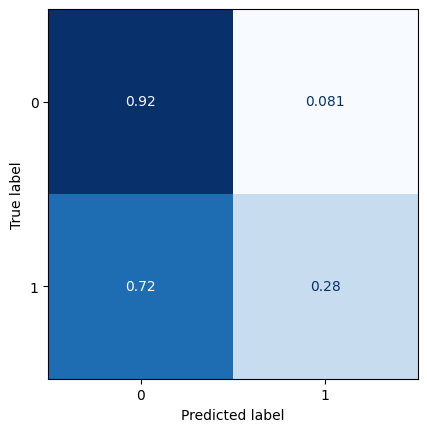

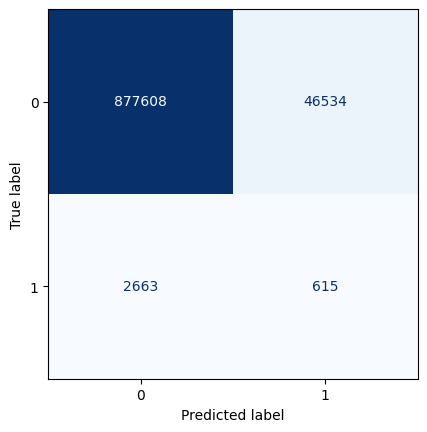

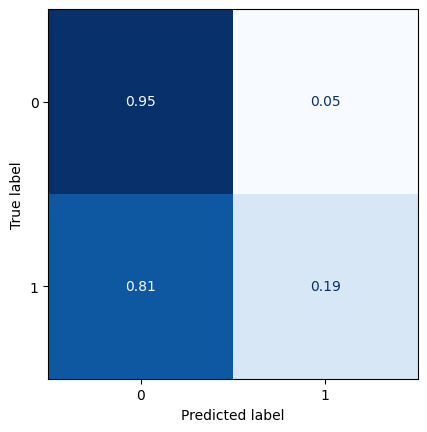

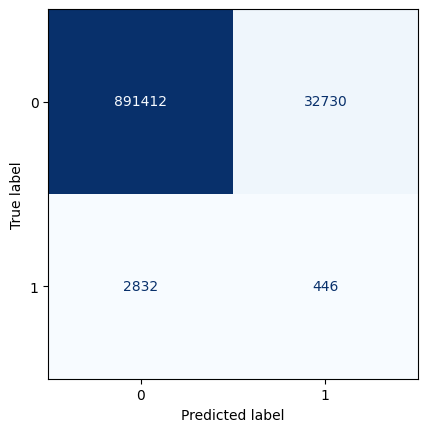

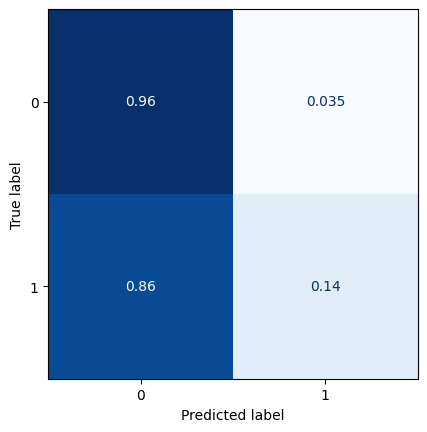

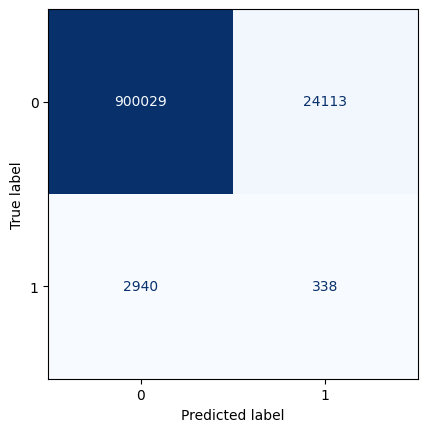

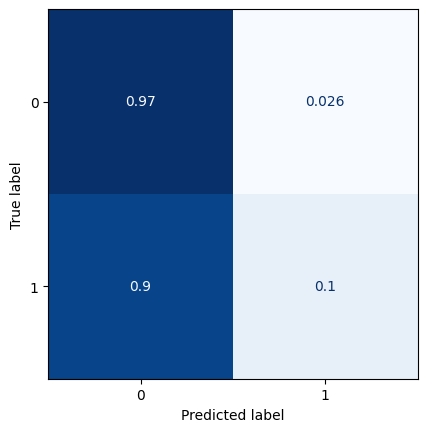

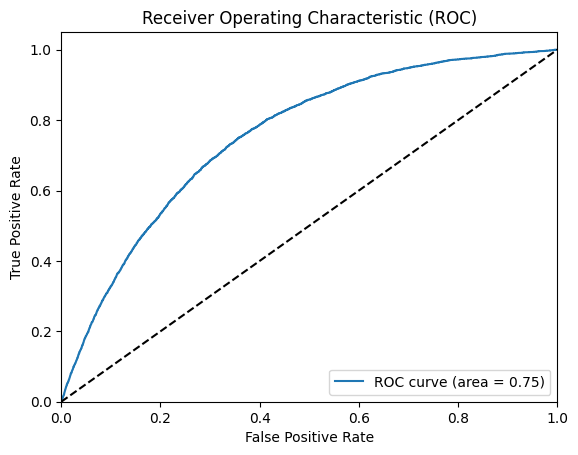

All zeros Brier score: 0.003534536671626663
Model Brier score: 0.004878098476988099
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        time  latitude  longitude  \
0             0         34307       34307  2016-04-01       0.0       20.0   
1             1         34308       34308  2016-04-01       0.0       22.5   
2             2         34309       34309  2016-04-01       0.0       25.0   
3             3         34310       34310  2016-04-01       0.0       27.5   
4             4         34311       34311  2016-04-01       0.0       30.0   

         vo          r     u_200     u_850     v_200     v_850         ttr  \
0  0.000004  81.055560 -8.377182  5.273445  2.527817  2.160847 -171.625750   
1 -0.000002  76.221700 -6.143539  4.284462  4.278809  2.030232 -145.830180   
2  0.000018  75.465416 -1.724731  3.315552  3.811935  1.344738 -121.705734   
3 -0.000009  72.850200  1.577347  1.549385  4.243774  2.951813 -123.376850   
4 -0.000009  82.229460  1.983276  1.535709  5.736717  0.0

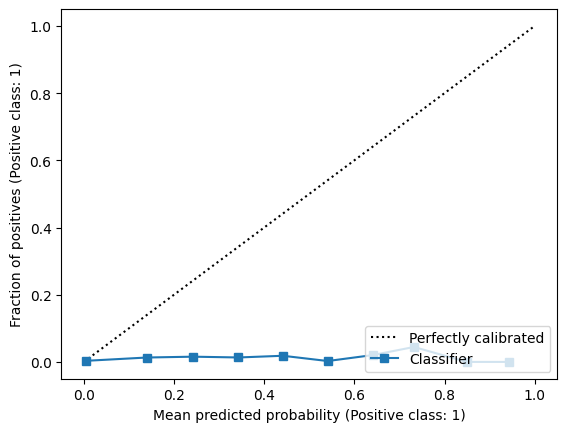

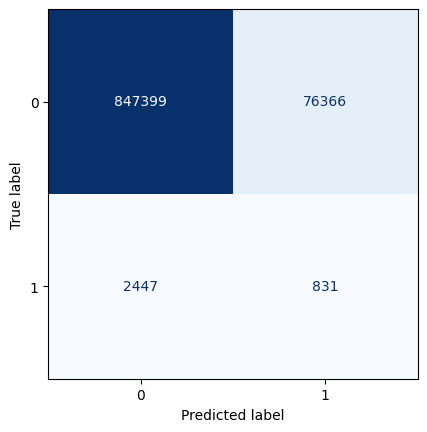

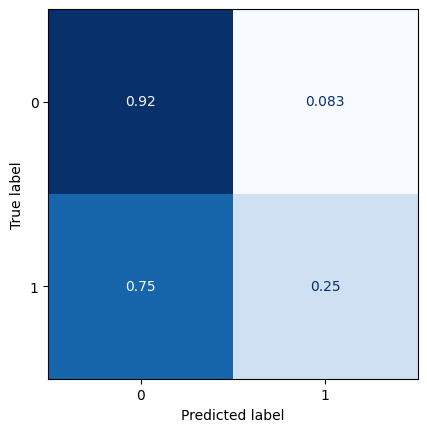

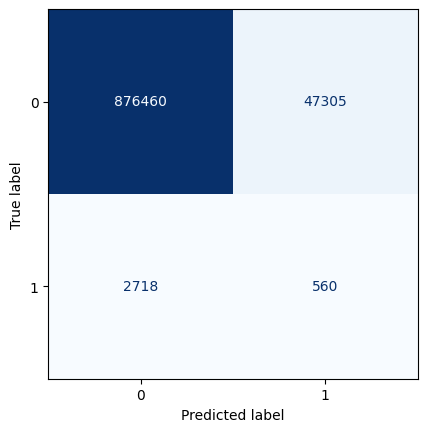

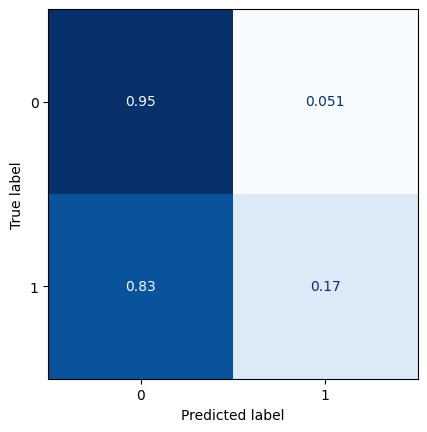

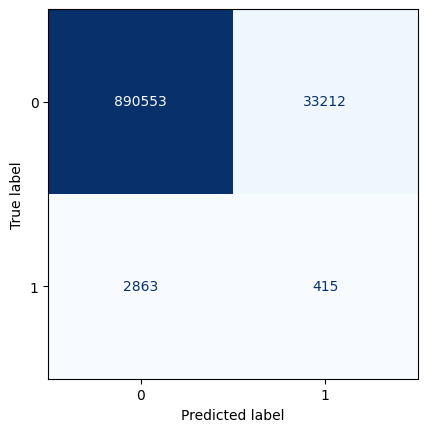

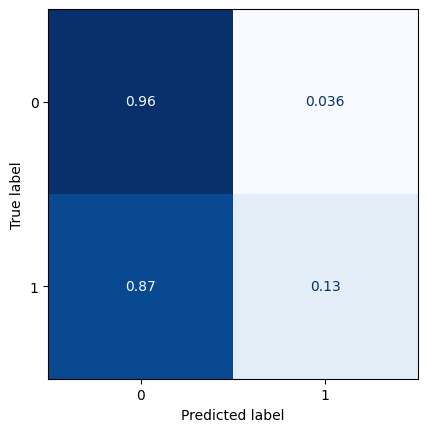

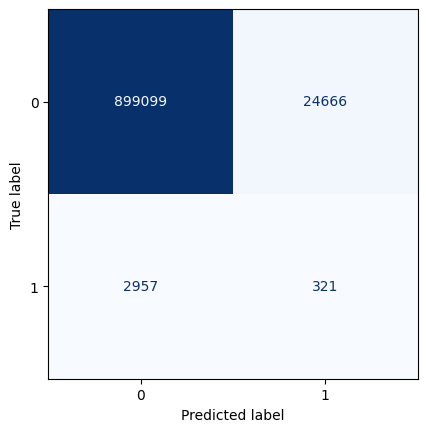

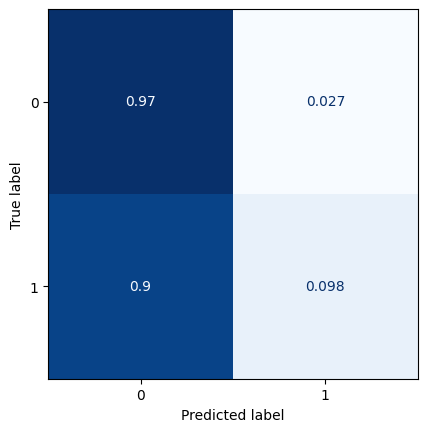

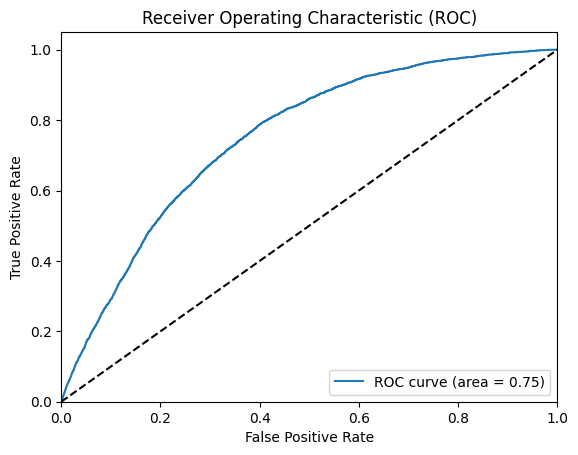

All zeros Brier score: 0.00353597405945571
Model Brier score: 0.0049197058414253425
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        time  latitude  longitude  \
0             0         34307       34307  2016-04-01       0.0       20.0   
1             1         34308       34308  2016-04-01       0.0       22.5   
2             2         34309       34309  2016-04-01       0.0       25.0   
3             3         34310       34310  2016-04-01       0.0       27.5   
4             4         34311       34311  2016-04-01       0.0       30.0   

         vo          r     u_200     u_850     v_200     v_850         ttr  \
0  0.000004  81.055560 -8.377182  5.273445  2.527817  2.160847 -171.625750   
1 -0.000002  76.221700 -6.143539  4.284462  4.278809  2.030232 -145.830180   
2  0.000018  75.465416 -1.724731  3.315552  3.811935  1.344738 -121.705734   
3 -0.000009  72.850200  1.577347  1.549385  4.243774  2.951813 -123.376850   
4 -0.000009  82.229460  1.983276  1.535709  5.736717  0.0

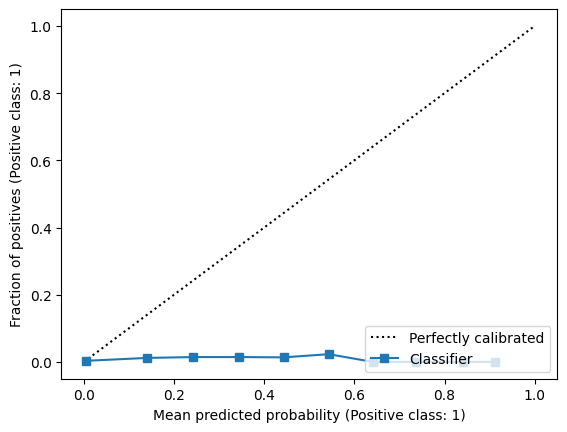

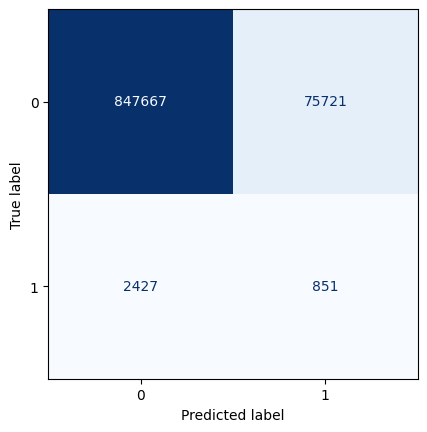

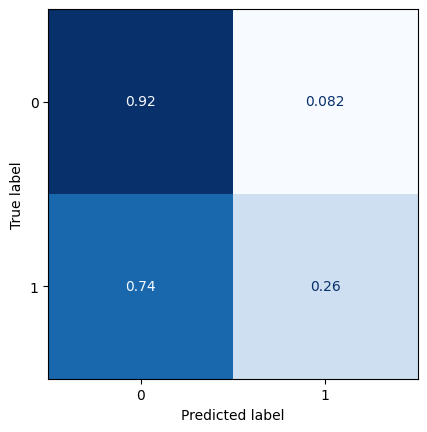

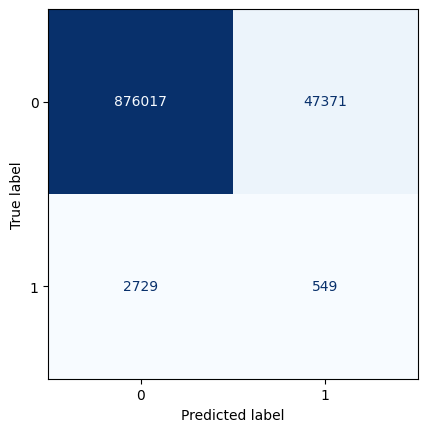

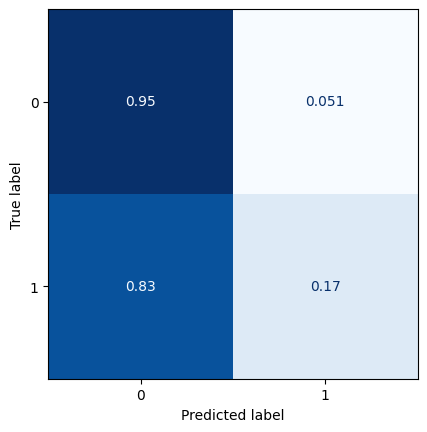

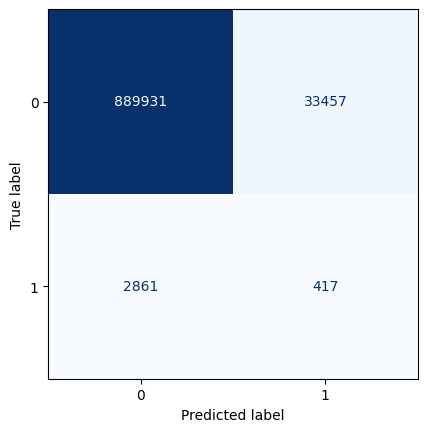

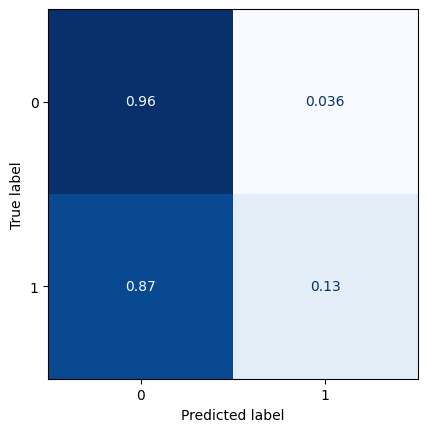

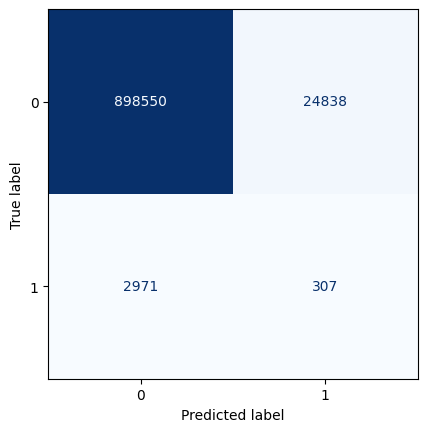

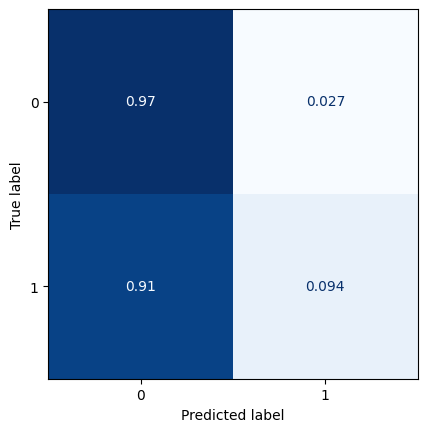

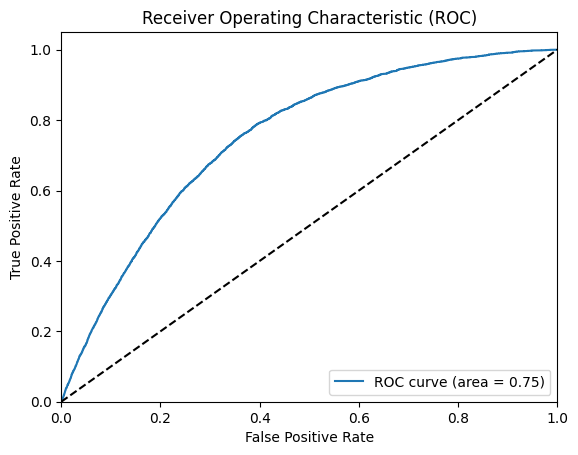

All zeros Brier score: 0.0035374126168436094
Model Brier score: 0.004928398819316867
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        time  latitude  longitude  \
0             0         34307       34307  2016-04-01       0.0       20.0   
1             1         34308       34308  2016-04-01       0.0       22.5   
2             2         34309       34309  2016-04-01       0.0       25.0   
3             3         34310       34310  2016-04-01       0.0       27.5   
4             4         34311       34311  2016-04-01       0.0       30.0   

         vo          r     u_200     u_850     v_200     v_850         ttr  \
0  0.000004  81.055560 -8.377182  5.273445  2.527817  2.160847 -171.625750   
1 -0.000002  76.221700 -6.143539  4.284462  4.278809  2.030232 -145.830180   
2  0.000018  75.465416 -1.724731  3.315552  3.811935  1.344738 -121.705734   
3 -0.000009  72.850200  1.577347  1.549385  4.243774  2.951813 -123.376850   
4 -0.000009  82.229460  1.983276  1.535709  5.736717  0.

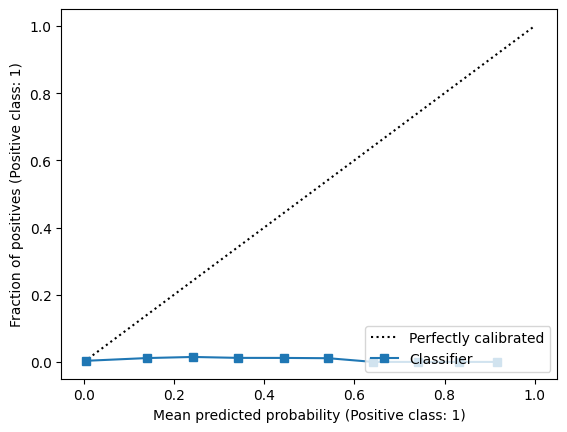

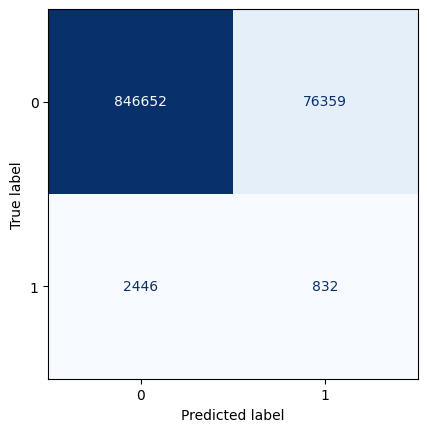

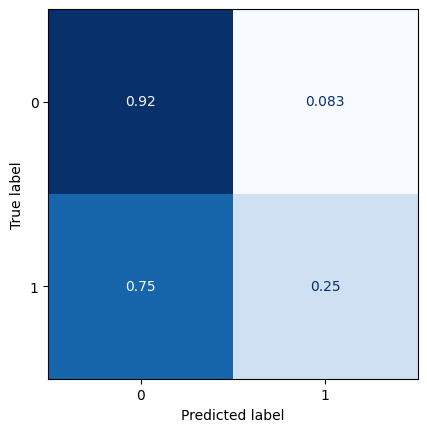

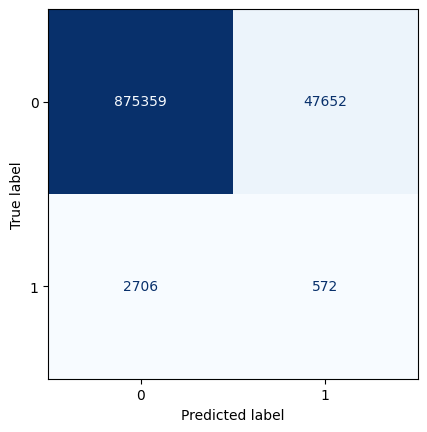

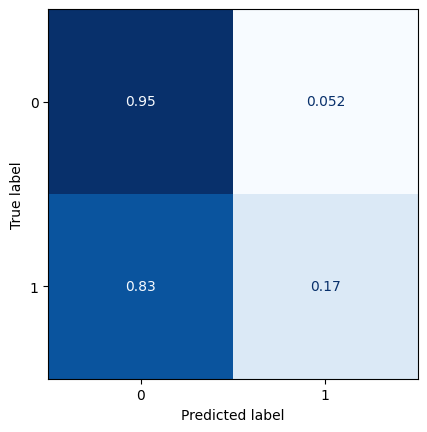

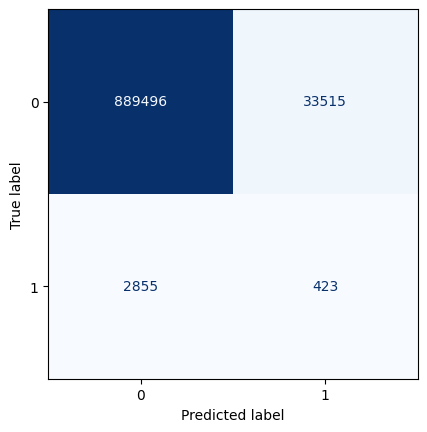

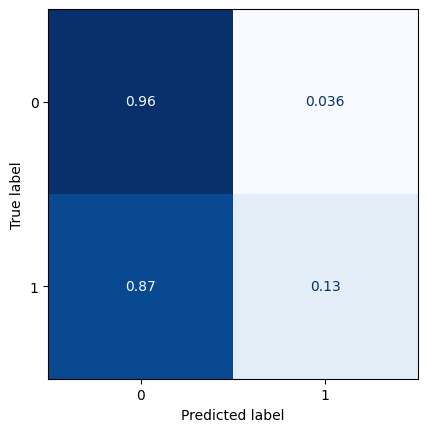

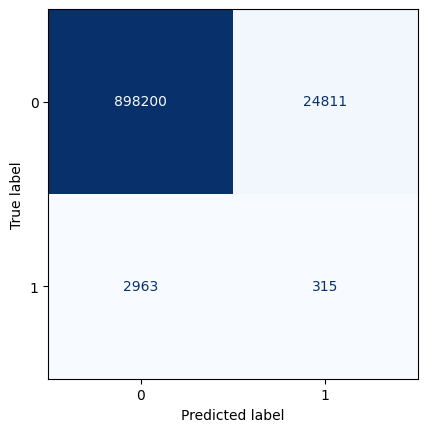

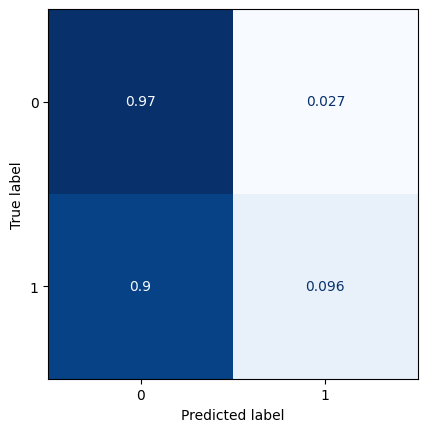

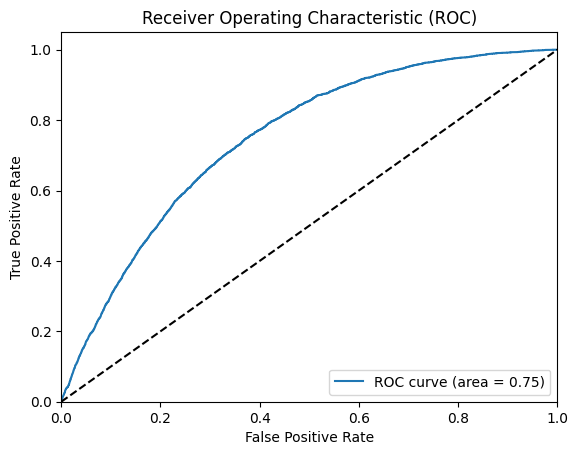

All zeros Brier score: 0.003538852345218393
Model Brier score: 0.0049308598892251485
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        time  latitude  longitude  \
0             0         34307       34307  2016-04-01       0.0       20.0   
1             1         34308       34308  2016-04-01       0.0       22.5   
2             2         34309       34309  2016-04-01       0.0       25.0   
3             3         34310       34310  2016-04-01       0.0       27.5   
4             4         34311       34311  2016-04-01       0.0       30.0   

         vo          r     u_200     u_850     v_200     v_850         ttr  \
0  0.000004  81.055560 -8.377182  5.273445  2.527817  2.160847 -171.625750   
1 -0.000002  76.221700 -6.143539  4.284462  4.278809  2.030232 -145.830180   
2  0.000018  75.465416 -1.724731  3.315552  3.811935  1.344738 -121.705734   
3 -0.000009  72.850200  1.577347  1.549385  4.243774  2.951813 -123.376850   
4 -0.000009  82.229460  1.983276  1.535709  5.736717  0.

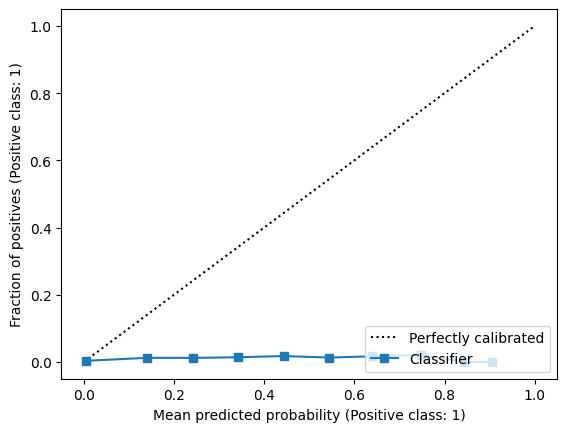

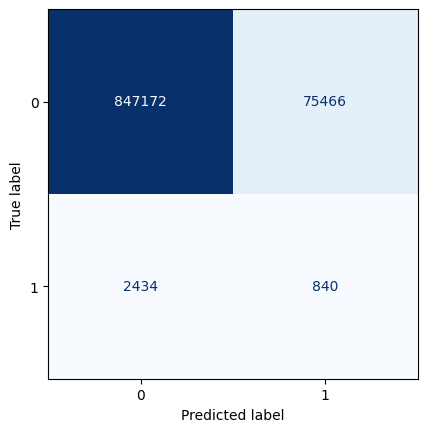

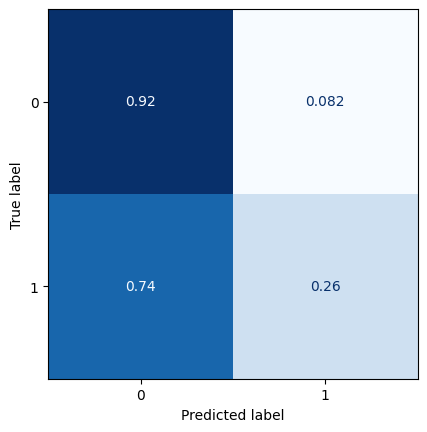

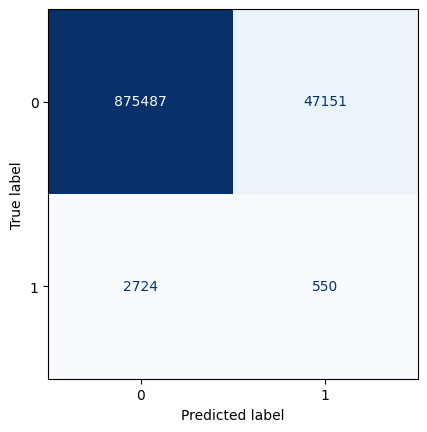

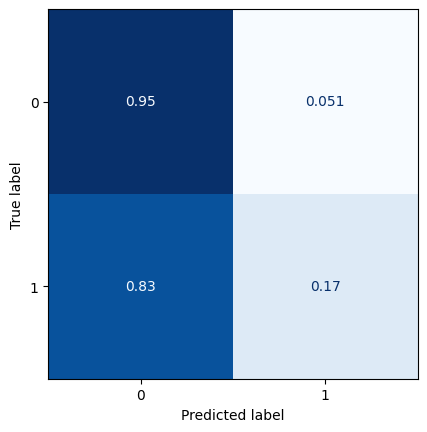

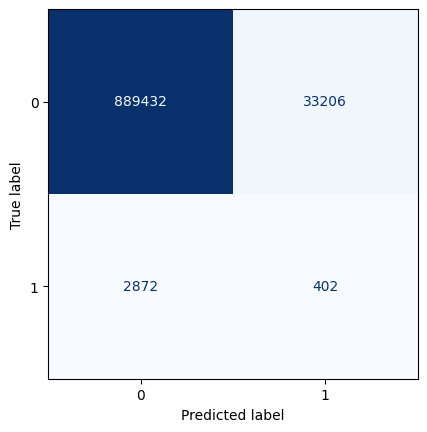

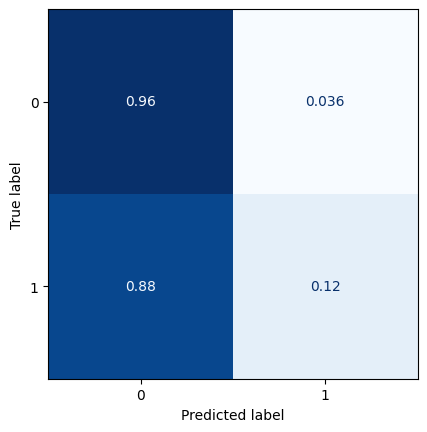

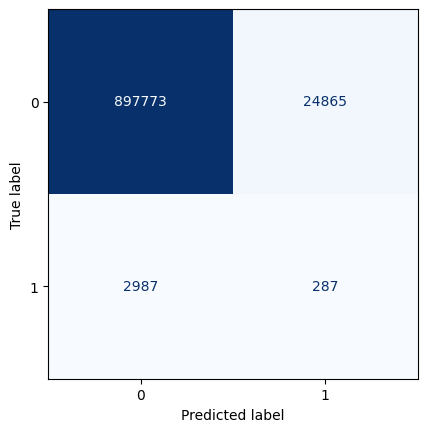

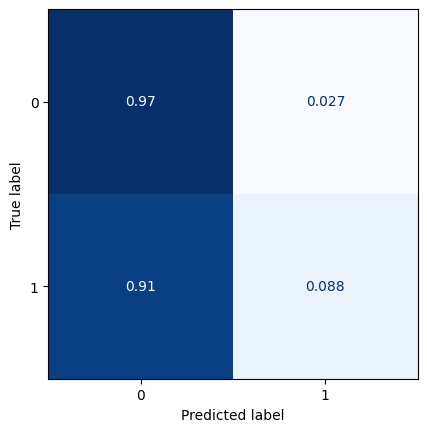

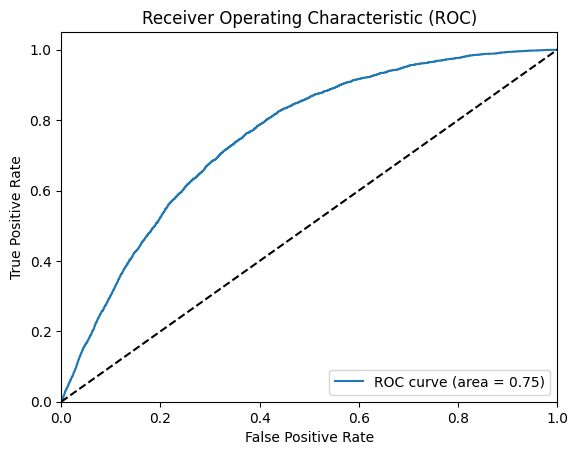

All zeros Brier score: 0.0035359731810366427
Model Brier score: 0.004923660861061851
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        time  latitude  longitude  \
0             0         34307       34307  2016-04-01       0.0       20.0   
1             1         34308       34308  2016-04-01       0.0       22.5   
2             2         34309       34309  2016-04-01       0.0       25.0   
3             3         34310       34310  2016-04-01       0.0       27.5   
4             4         34311       34311  2016-04-01       0.0       30.0   

         vo          r     u_200     u_850     v_200     v_850         ttr  \
0  0.000004  81.055560 -8.377182  5.273445  2.527817  2.160847 -171.625750   
1 -0.000002  76.221700 -6.143539  4.284462  4.278809  2.030232 -145.830180   
2  0.000018  75.465416 -1.724731  3.315552  3.811935  1.344738 -121.705734   
3 -0.000009  72.850200  1.577347  1.549385  4.243774  2.951813 -123.376850   
4 -0.000009  82.229460  1.983276  1.535709  5.736717  0.

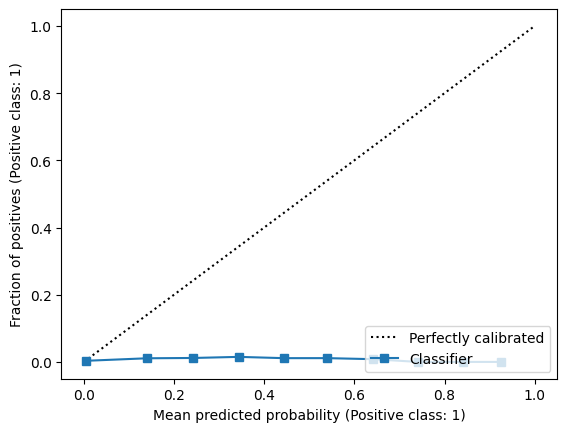

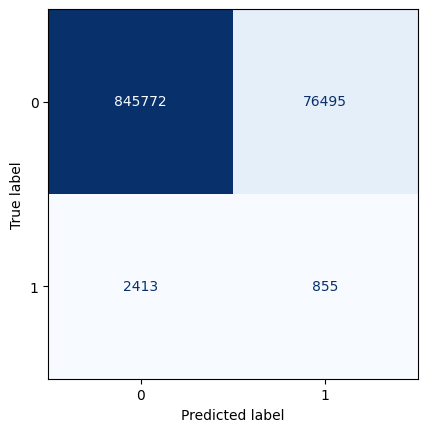

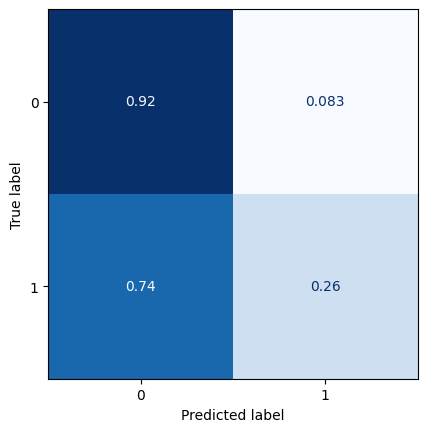

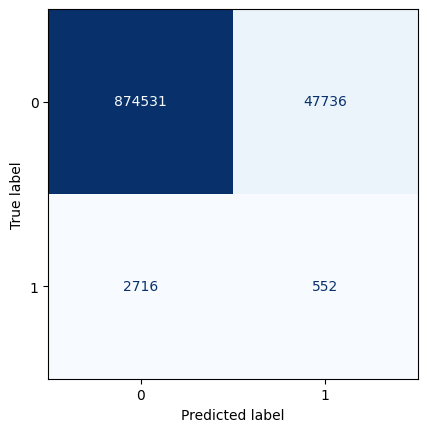

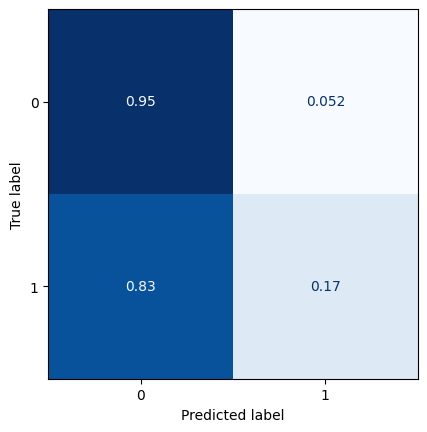

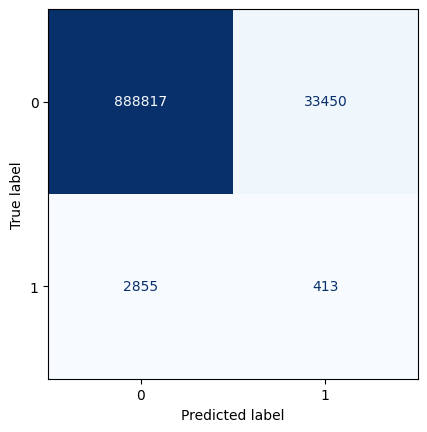

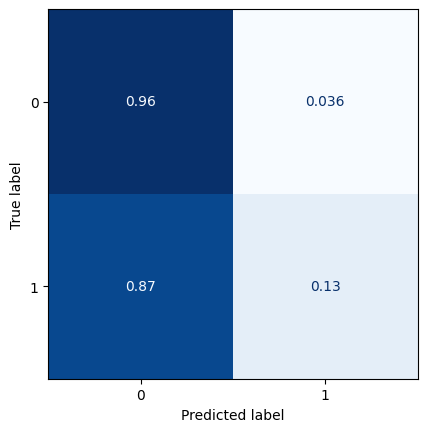

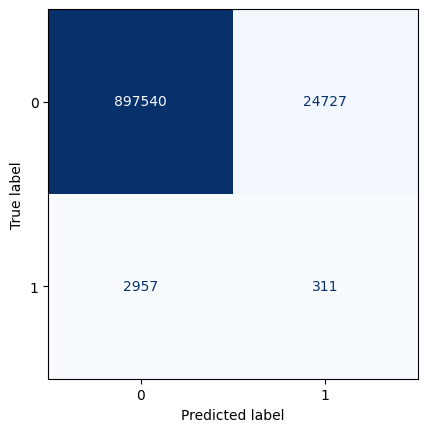

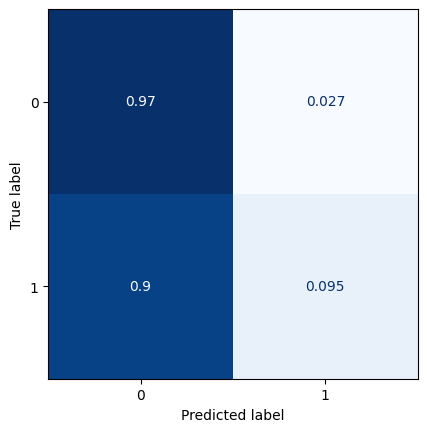

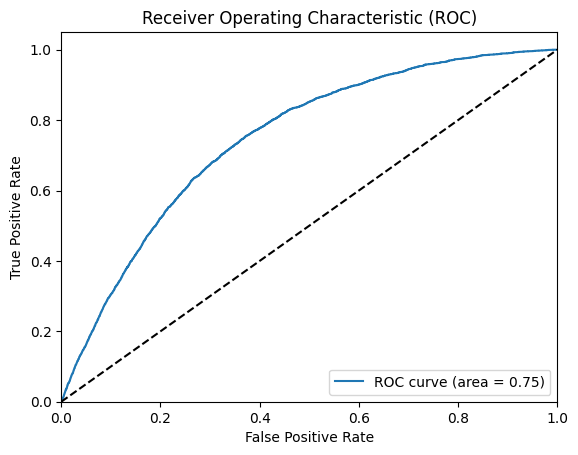

All zeros Brier score: 0.0035309307589664355
Model Brier score: 0.004899199806823685
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        time  latitude  longitude  \
0             0         34307       34307  2016-04-01       0.0       20.0   
1             1         34308       34308  2016-04-01       0.0       22.5   
2             2         34309       34309  2016-04-01       0.0       25.0   
3             3         34310       34310  2016-04-01       0.0       27.5   
4             4         34311       34311  2016-04-01       0.0       30.0   

         vo          r     u_200     u_850     v_200     v_850         ttr  \
0  0.000004  81.055560 -8.377182  5.273445  2.527817  2.160847 -171.625750   
1 -0.000002  76.221700 -6.143539  4.284462  4.278809  2.030232 -145.830180   
2  0.000018  75.465416 -1.724731  3.315552  3.811935  1.344738 -121.705734   
3 -0.000009  72.850200  1.577347  1.549385  4.243774  2.951813 -123.376850   
4 -0.000009  82.229460  1.983276  1.535709  5.736717  0.

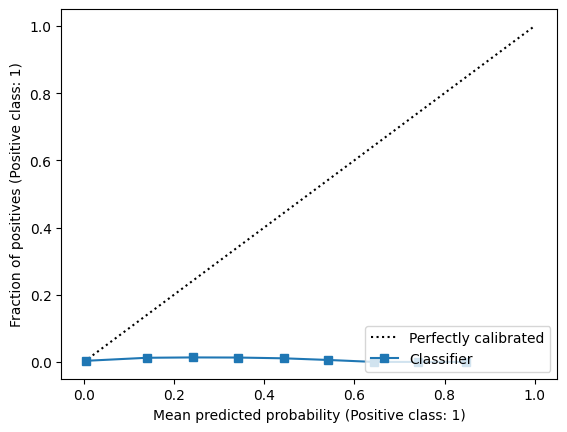

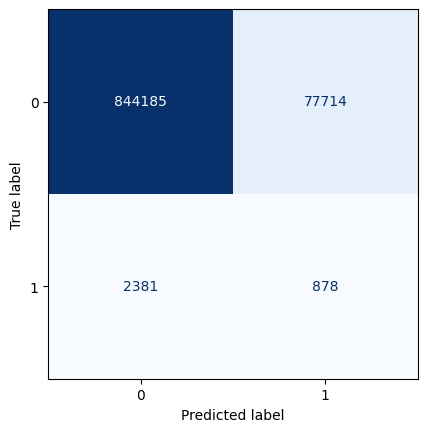

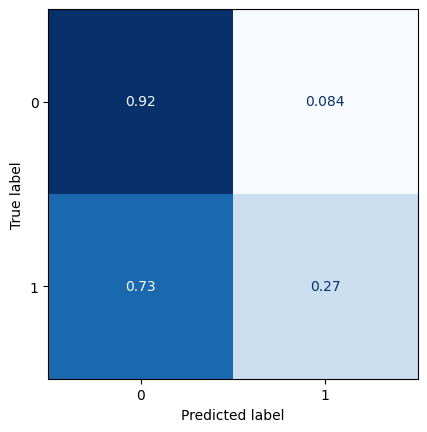

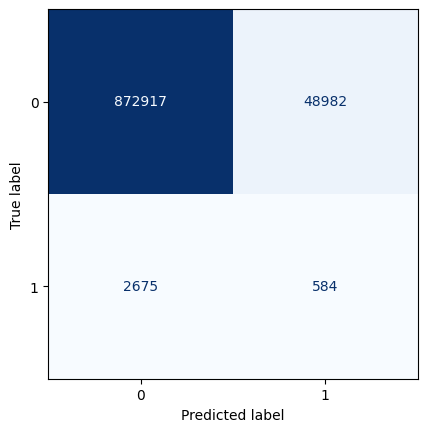

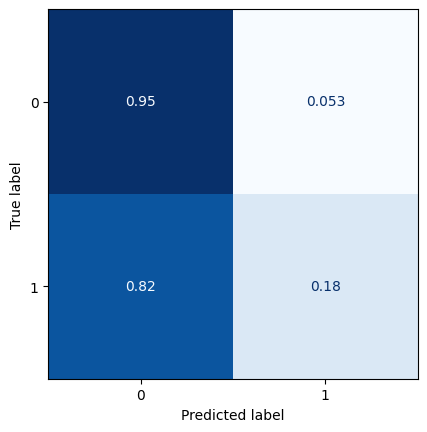

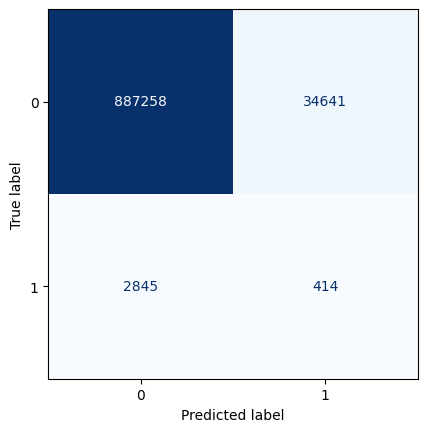

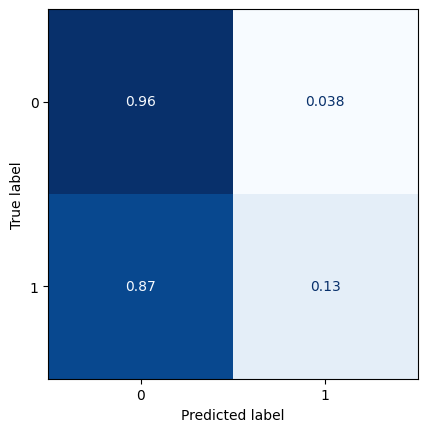

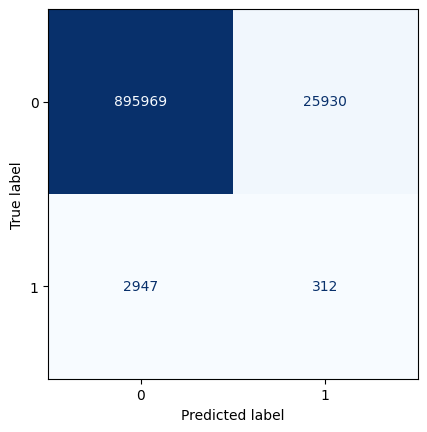

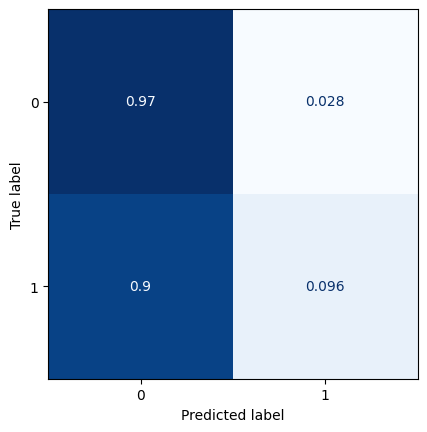

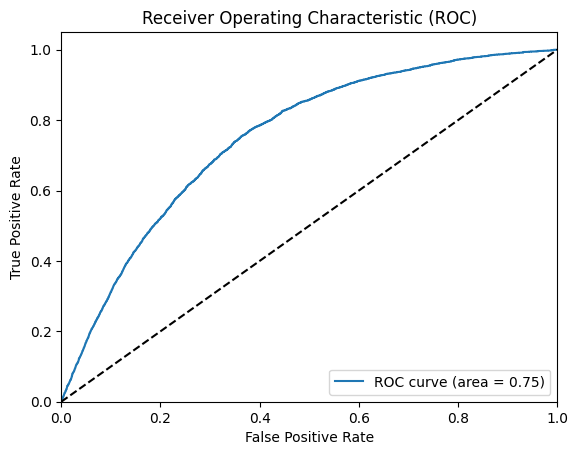

All zeros Brier score: 0.003522641537985944
Model Brier score: 0.004974630567303551
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        time  latitude  longitude  \
0             0         34307       34307  2016-04-01       0.0       20.0   
1             1         34308       34308  2016-04-01       0.0       22.5   
2             2         34309       34309  2016-04-01       0.0       25.0   
3             3         34310       34310  2016-04-01       0.0       27.5   
4             4         34311       34311  2016-04-01       0.0       30.0   

         vo          r     u_200     u_850     v_200     v_850         ttr  \
0  0.000004  81.055560 -8.377182  5.273445  2.527817  2.160847 -171.625750   
1 -0.000002  76.221700 -6.143539  4.284462  4.278809  2.030232 -145.830180   
2  0.000018  75.465416 -1.724731  3.315552  3.811935  1.344738 -121.705734   
3 -0.000009  72.850200  1.577347  1.549385  4.243774  2.951813 -123.376850   
4 -0.000009  82.229460  1.983276  1.535709  5.736717  0.0

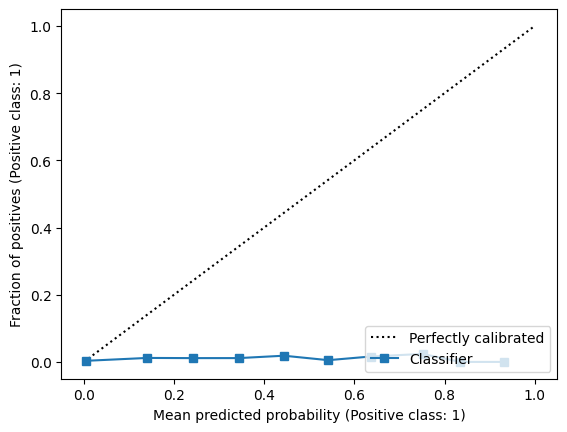

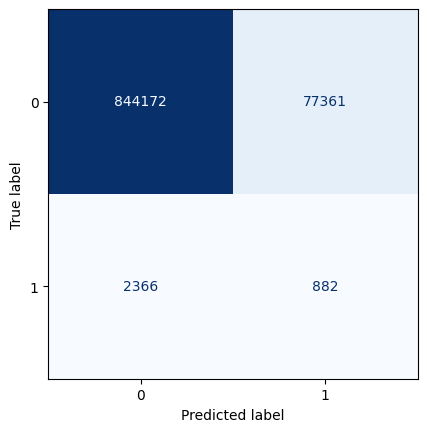

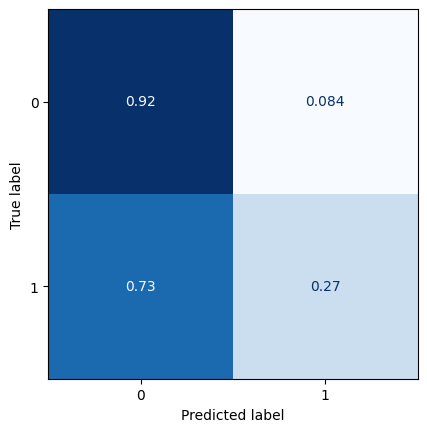

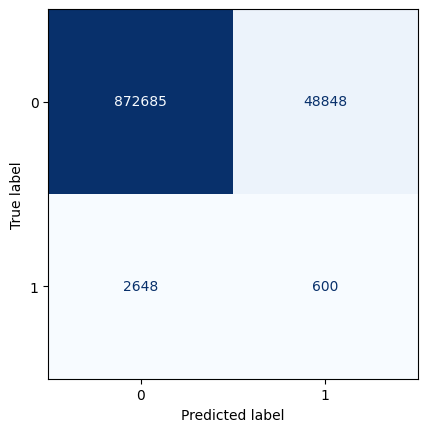

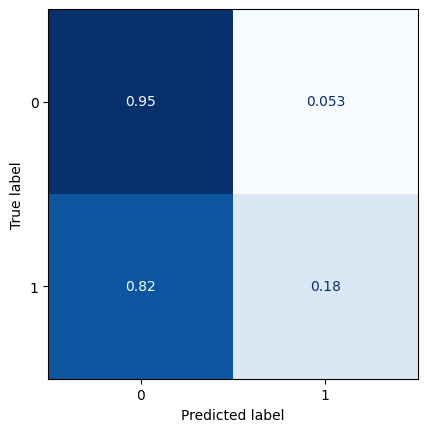

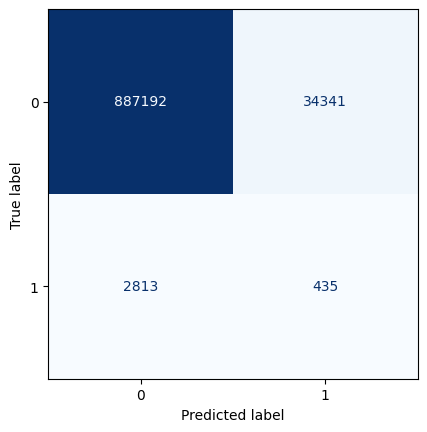

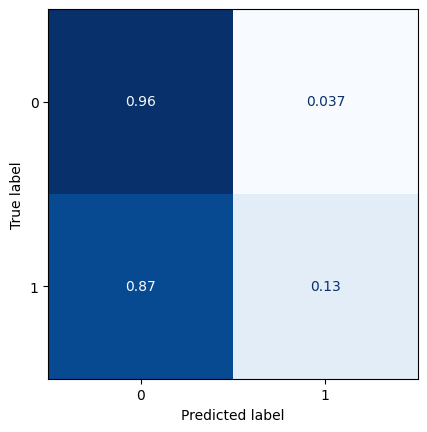

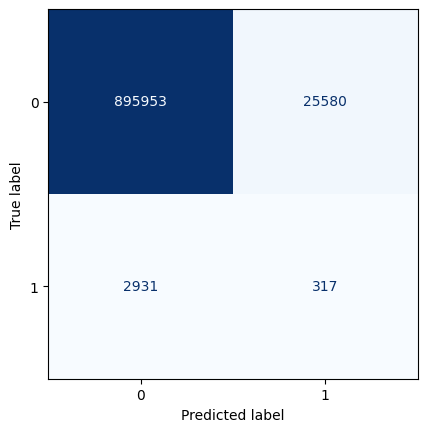

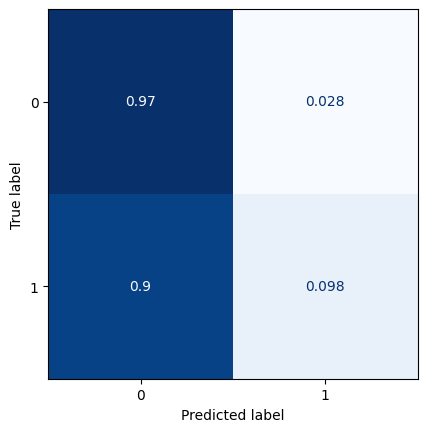

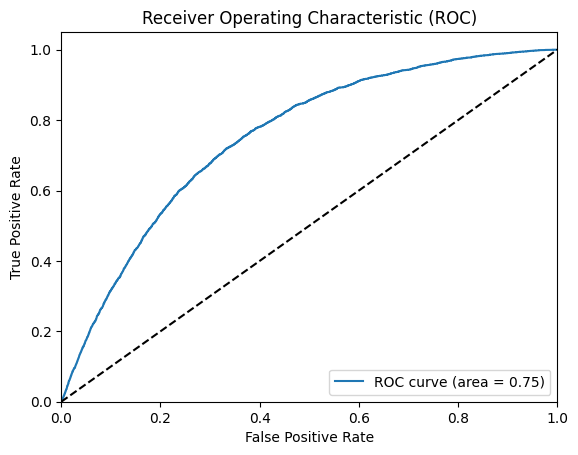

All zeros Brier score: 0.0035121828843801936
Model Brier score: 0.004908082684071374
   Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        time  latitude  longitude  \
0             0         34307       34307  2016-04-01       0.0       20.0   
1             1         34308       34308  2016-04-01       0.0       22.5   
2             2         34309       34309  2016-04-01       0.0       25.0   
3             3         34310       34310  2016-04-01       0.0       27.5   
4             4         34311       34311  2016-04-01       0.0       30.0   

         vo          r     u_200     u_850     v_200     v_850         ttr  \
0  0.000004  81.055560 -8.377182  5.273445  2.527817  2.160847 -171.625750   
1 -0.000002  76.221700 -6.143539  4.284462  4.278809  2.030232 -145.830180   
2  0.000018  75.465416 -1.724731  3.315552  3.811935  1.344738 -121.705734   
3 -0.000009  72.850200  1.577347  1.549385  4.243774  2.951813 -123.376850   
4 -0.000009  82.229460  1.983276  1.535709  5.736717  0.

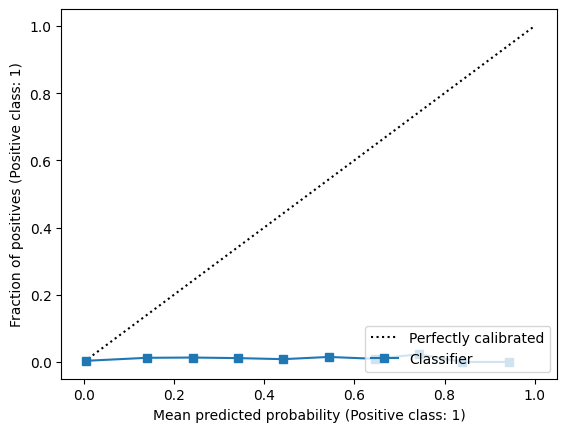

In [20]:
for lag in [1,2,3,4,5,6,7,8,9,10,11,12,13]:
    ### Model 
    
    base = DecisionTreeClassifier(splitter='random', min_samples_split=1000, random_state=0)
    clf = AdaBoostClassifier(base_estimator=base, n_estimators=50, random_state=0, learning_rate=1)
    clf.fit(np.concatenate((x_train_scaled[:-lag*377],x_val_scaled[:-lag*377]),axis=0), np.concatenate((y_train[lag*377:],y_val[lag*377:]),axis=0))

    ### Confusion matrices
    t = clf.predict_proba(x_test_scaled[:-lag*377])
    t = t[:,1]

    ranges = [0.025,0.05,0.075,0.1]
    
    for j in ranges:
        classes = []
        for i in t:
            if i<=j: classes.append(0)
            else: classes.append(1)
    
        ConfusionMatrixDisplay(confusion_matrix(y_test[lag*377:], classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
        ConfusionMatrixDisplay(confusion_matrix(y_test[lag*377:], classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    
    ### ROC
    plot_roc(t,y_test[lag*377:])
    
    z = np.zeros((lag*377,1))
    tt = np.concatenate((t.reshape(-1,1),z))
    test['predictions_lag'+str(lag)] = tt.reshape(-1,1)
    test.to_csv("test_with_newTarget_predictions_AdaBoost_noOversampling.csv")
    
    ### calibration
    display = CalibrationDisplay.from_predictions(y_test[lag*377:], t, n_bins=10)
    print(f'All zeros Brier score: {brier_score_loss(y_test[lag*377:], np.zeros(len(y_test[lag*377:])))}')
    print(f'Model Brier score: {brier_score_loss(y_test[lag*377:], t)}')
    print(test.head())


#### Check

In [59]:
res = pd.read_csv('/Users/paolo/Documents/TC/Paolo/Notebooks_newTarget/test_with_newTarget_predictions_AdaBoost_noOversampling.csv')

score = np.average((res.new_target/100 - np.zeros(res.shape[0])) ** 2)
print(f'Brier score, all zeros: {score}\n')
for lag in range(14):
    if lag == 0:
        score = np.average((res.new_target/100 - res.predictions_lag0) ** 2)
    else:
        col = 'predictions_lag'+str(lag)
        score = np.average((res.new_target[377*lag:].values/100 - res[:-377*lag].loc[:,col].values)**2)
    
    print(f'Brier score, lag {lag}: {score}\n')
    print(f'Brier skill score, lag {lag}: {(0.0028244908639929586-score)/0.0028244908639929586}\n')
    

Brier score, all zeros: 0.0028828128596659927

Brier score, lag 0: 0.002581717821693349

Brier skill score, lag 0: 0.08595285097024649

Brier score, lag 1: 0.00321757190847779

Brier skill score, lag 1: -0.13916881427937647

Brier score, lag 2: 0.0038217769100828912

Brier skill score, lag 2: -0.3530852440712369

Brier score, lag 3: 0.004207332742029094

Brier skill score, lag 3: -0.48958978613272036

Brier score, lag 4: 0.004244620478982408

Brier skill score, lag 4: -0.5027913643104599

Brier score, lag 5: 0.004274977730581801

Brier skill score, lag 5: -0.513539231115905

Brier score, lag 6: 0.004224867503186339

Brier skill score, lag 6: -0.4957979000908079

Brier score, lag 7: 0.004271686894214714

Brier skill score, lag 7: -0.5123741233051349

Brier score, lag 8: 0.00427971496998169

Brier skill score, lag 8: -0.5152164322923295

Brier score, lag 9: 0.004275970875863583

Brier skill score, lag 9: -0.5138908503384851

Brier score, lag 10: 0.004272871157234321

Brier skill score, l